# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import re
import time

from wordcloud import WordCloud

import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

import spacy

from collections import defaultdict, Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import manifold, cluster, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, silhouette_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.optimize import linear_sum_assignment

import tensorflow as tf
import tensorflow.keras
import tensorflow_hub as hub
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, BertModel

from datasets import load_metric, Dataset

import gensim
from gensim.models import Word2Vec

from PIL import Image, ImageEnhance

import cv2

import locale
import os #intéragir avec le système d'exploitation
import zipfile #lecture et écriture pour les fichiers zip
import urllib #gestion des url
import sqlite3
import sys
import os

# Obtenir le répertoire de travail courant (répertoire du notebook)
current_dir = os.getcwd()

# Chemin relatif vers le répertoire contenant fonctions.py
relative_path = 'Openclassrooms'

# Chemin absolu vers le répertoire contenant fonctions.py
absolute_path = os.path.join(current_dir, relative_path)

# Insérer le chemin relatif dans sys.path
sys.path.insert(1, absolute_path)

# Importer les fonctions depuis fonctions.py
from fonctions import data_information, doublons

In [2]:
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)

Matplotlib version: 3.9.0
Seaborn version: 0.13.2


In [3]:
data = pd.read_csv('Flipkart/flipkart_com-ecommerce_sample_1050.csv')

In [4]:
display(data_information(data))
display(doublons(data))

Nombre de ligne : 1050 Nombre de colonne : 15
------
Types des variables :
object     12
float64     2
bool        1
dtype: int64
------
% de valeurs manquantes par colonne : 


brand                      0.321905
retail_price               0.000952
discounted_price           0.000952
product_specifications     0.000952
uniq_id                    0.000000
crawl_timestamp            0.000000
product_url                0.000000
product_name               0.000000
product_category_tree      0.000000
pid                        0.000000
image                      0.000000
is_FK_Advantage_product    0.000000
description                0.000000
product_rating             0.000000
overall_rating             0.000000
dtype: float64

None

Il n'y a pas de doublons 


None

# Analyse exploratoire

In [5]:
display(data.head())

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

**Définition des variables**

- uniq_id : identifiant unique
- crawl_timestamp :date/heure de visite de la page web
- product_url : adresse internet du produit
- product_name : nom du produit
- product_category_tree : arborescence du produit
- pid : numéro unique utilisé par le système d'exploitation pour identifier un processus en cours d'exécution
- retail_price : prix de vente
- discounted_price : prix promotion
- image : nom de l'image + format
- is_FK_Advantage_product : appartenance a la catégorie 'avantage produit'
- description : description du produit
- product_rating : note du produit
- overall_rating : note globale
- brand : marque
- product_specifications : spécificité du produit

In [6]:
# Définir l'option pour afficher toutes les colonnes sans raccourcissement
pd.set_option('display.max_colwidth', None)

In [7]:
display(data.describe(include='all'))

uniq_id            crawl_timestamp  \
count                               1050                       1050   
unique                              1050                        149   
top     55b85ea15a1536d46b7190ad6fff8ce7  2015-12-01 12:40:44 +0000   
freq                                   1                        150   
mean                                 NaN                        NaN   
std                                  NaN                        NaN   
min                                  NaN                        NaN   
25%                                  NaN                        NaN   
50%                                  NaN                        NaN   
75%                                  NaN                        NaN   
max                                  NaN                        NaN   

                                                                                                                       product_url  \
count                                                                                                                         1050   
unique                                                                                                                        1050   
top     http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z   
freq                                                                                                                             1   
mean                                                                                                                           NaN   
std                                                                                                                            NaN   
min                                                                                                                            NaN   
25%                                                                                                                            NaN   
50%                                                                                                                            NaN   
75%                                                                                                                            NaN   
max                                                                                                                            NaN   

                                                      product_name  \
count                                                         1050   
unique                                                        1050   
top     Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
freq                                                             1   
mean                                                           NaN   
std                                                            NaN   
min                                                            NaN   
25%                                                            NaN   
50%                                                            NaN   
75%                                                            NaN   
max                                                            NaN   

                                                product_category_tree  \
count                                                            1050   
unique                                                            642   
top     ["Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars"]   
freq                                                               56   
mean                                                              NaN   
std                                                               NaN   
min                                                               NaN   
25%                                                               NaN   
50%                                                               NaN   


**COMMENTAIRE**

- Il y a 1050 produits
- 642 chemin de catégorie produit
- 11 marques
- 1050 images 
- 1050 descriptions

## Arborescence categorie produit

On sépare le chemin des catégories produits en plusieurs variables afin de faire l'analyse lexicale et d'image en fonction des catégories produits.

In [8]:
print(data['product_category_tree'].head())

0                             ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]
1    ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]
3      ["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]
4               ["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]
Name: product_category_tree, dtype: object


**COMMENTAIRE**

On remarque qu'il y a une forme récurrente d'écriture, on va s'en servir afin de séparer les catégories produits.

In [9]:
# Fonction pour compter le nombre de catégories
def count_categories(category_tree):
    return category_tree.count('>>') + 1

# Appliquer la fonction de comptage
data['category_count'] = data['product_category_tree'].apply(count_categories)

# Afficher les données transformées
display(data.loc[0, ['product_category_tree', 'category_count']])

product_category_tree    ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]
category_count                                                                                                                          4
Name: 0, dtype: object

In [10]:
# Fonction pour nettoyer et séparer les catégories
def split_categories(category_tree):
    # Enlever les caractères '[ "', ']', et les espaces superflus en utilisant des expressions régulières
    category_tree = re.sub(r'[\[\]"]', '', category_tree).strip()
    # Séparer les catégories en utilisant '>>' comme délimiteur
    categories = category_tree.split('>>')
    # Enlever les espaces superflus autour des catégories
    categories = [category.strip() for category in categories]
    return categories

# Appliquer la fonction de nettoyage et de séparation
data['category_list'] = data['product_category_tree'].apply(split_categories)

for i in range(1, data['category_count'].max() + 1):
    col_name = f'cat_product_{i}'
    data[col_name] = data['category_list'].apply(lambda x: x[i-1] if len(x) >= i else None)

# Supprimer la colonne temporaire 'category_list'
data.drop(columns=['category_list'], inplace=True)

In [11]:
# Sauvegarde du data
data.to_csv('data_projet6.csv', index=False)

In [12]:
# Affichage du nombre de catégorie par niveau

for i in range(1, data['category_count'].max() + 1):
    col_name = f"cat_product_{i}"
    print('Catégorie', i, ':',data[col_name].nunique())
    
print('')
print(data['cat_product_1'].unique())

Catégorie 1 : 7
Catégorie 2 : 62
Catégorie 3 : 241
Catégorie 4 : 349
Catégorie 5 : 297
Catégorie 6 : 117
Catégorie 7 : 57

['Home Furnishing' 'Baby Care' 'Watches' 'Home Decor & Festive Needs'
 'Kitchen & Dining' 'Beauty and Personal Care' 'Computers']


**COMMENTAIRE**

On regarde comment sont répartis les sous catégories de la catégorie 2.

In [13]:
grouped_data = data.groupby(['cat_product_2']).size().reset_index(name='counts')
display(grouped_data.sort_values(by='counts', ascending=True).head())

cat_product_2  counts
30           Garden & Leisure       1
51                   Software       1
16  Consumables & Disposables       1
60            Women's Hygiene       1
53  Strollers & Activity Gear       1

**COMMENTAIRE**

Il y a des catégories avec 1 seule sous catégorie on regarde maintenant la répartition plus précisément.

In [14]:
def create_category_subcategory_dfs(df):
    category_dfs = {}
    
    # Premier niveau de catégorie
    level1_col = "cat_product_1"
    # Deuxième niveau de catégorie
    level2_col = "cat_product_2"
    
    # Créer un DataFrame pour chaque catégorie du premier niveau
    for category in df[level1_col].unique():
        # Comptage des sous-catégories du deuxième niveau
        subcategory_counts = df[df[level1_col] == category][level2_col].value_counts().reset_index()
        subcategory_counts.columns = [level2_col, 'sub_category_count']
        category_dfs[category] = subcategory_counts
    
    return category_dfs

# Appel de la fonction avec votre DataFrame
category_dfs = create_category_subcategory_dfs(data)

# Affichage des DataFrames pour chaque catégorie
for category, subcategory_df in category_dfs.items():
    print(f"Catégorie: {category}")
    display(subcategory_df)
    print("")

Catégorie: Home Furnishing


cat_product_2  sub_category_count
0                    Bed Linen                  65
1                   Bath Linen                  21
2       Curtains & Accessories                  19
3       Kitchen & Dining Linen                  14
4   Cushions, Pillows & Covers                  13
5                       Living                   6
6              Floor Coverings                   6
7       Living Room Furnishing                   3
8          JMD Home Furnishing                   1
9      Kripa's Home Furnishing                   1
10        Tidy Home Furnishing                   1


Catégorie: Baby Care


cat_product_2  sub_category_count
0                 Infant Wear                  84
1                Baby Bedding                  15
2           Baby & Kids Gifts                  15
3            Baby Bath & Skin                  14
4           Feeding & Nursing                   8
5  Diapering & Potty Training                   7
6               Baby Grooming                   4
7     Furniture & Furnishings                   2
8   Strollers & Activity Gear                   1


Catégorie: Watches


cat_product_2  sub_category_count
0  Wrist Watches                 149
1         Clocks                   1


Catégorie: Home Decor & Festive Needs


cat_product_2  sub_category_count
0                       Showpieces                  71
1        Table Decor & Handicrafts                  27
2              Wall Decor & Clocks                  22
3      Decorative Lighting & Lamps                  14
4          Flowers, Plants & Vases                   5
5                        Showpiece                   5
6              Religion & Devotion                   3
7             Candles & Fragrances                   1
8  TRUE Home Decor & Festive Needs                   1
9                 Garden & Leisure                   1


Catégorie: Kitchen & Dining


cat_product_2  sub_category_count
0                 Coffee Mugs                  74
1                    Cookware                  27
2               Kitchen Tools                  14
3        Containers & Bottles                  13
4             Bar & Glassware                   8
5                    Lighting                   7
6         Tableware & Cutlery                   3
7   Consumables & Disposables                   1
8     Pressure Cookers & Pans                   1
9      Housekeeping & Laundry                   1
10      Dinnerware & Crockery                   1


Catégorie: Beauty and Personal Care


cat_product_2  sub_category_count
0           Fragrances                  65
1      Combos and Kits                  24
2               Makeup                  18
3   Body and Skin Care                  15
4            Hair Care                   9
5          Health Care                   7
6         Bath and Spa                   7
7             Eye Care                   2
8      Women's Hygiene                   1
9       Men's Grooming                   1
10  Beauty Accessories                   1


Catégorie: Computers


cat_product_2  sub_category_count
0    Laptop Accessories                  87
1    Network Components                  49
2  Computer Peripherals                   4
3    Tablet Accessories                   3
4               Storage                   2
5               Laptops                   2
6   Computer Components                   2
7              Software                   1

**COMMENTAIRE**

Les 7 catégories produits nous permettent d'avoir une vision plus précise des différents types de produits et donc de mots et type d'image que l'on pourrai avoir.

- **Watches** a 2 sous catégories dont 1 avec 1 seule sous catégorie.

In [15]:
# Fonction pour afficher les sous-catégories récursivement
def get_subcategory_path(df, category_name):
    max_level = df['category_count'].max()
    
    # Trouver le niveau de la catégorie donnée
    category_level = None
    for i in range(1, max_level + 1):
        col_name = f'cat_product_{i}'
        if category_name in df[col_name].values:
            category_level = i
            break
    
    if category_level is None:
        return f"La catégorie '{category_name}' n'existe pas dans les données."
    
    def recursive_subcategories(current_category, current_level):
        if current_level > max_level:
            return [current_category]
        
        next_level = current_level + 1
        next_col_name = f'cat_product_{next_level}'
        subcategories = df[df[f'cat_product_{current_level}'] == current_category][next_col_name].dropna().unique()
        
        if len(subcategories) == 0:
            return [current_category]
        
        paths = []
        for subcategory in subcategories:
            sub_paths = recursive_subcategories(subcategory, next_level)
            for path in sub_paths:
                paths.append(f"{current_category} >> {path}")
        
        return paths
    
    return recursive_subcategories(category_name, category_level)

In [16]:
# On regarde pour Clocks de watches

category_name = 'Clocks'
subcategory_paths = get_subcategory_path(data, category_name)
print(f"Sous-catégories de '{category_name}':")
for path in subcategory_paths:
    print(path)

Sous-catégories de 'Clocks':
Clocks >> Table Clocks >> Like Table Clocks >> Like Analog Purple Clock


**COMMENTAIRE** 

Il y a 1 seul chemin pour Clocks avec 2 informations : 'horloge de table' et 'horloge analogique violette'. Regardons ce qu'il y a comme produit afin d'analyser la pertinence du chemin de catégorie.

In [17]:
# Fonction pour afficher jusqu'à 5 images par catégorie exacte
def show_images_by_exact_category(df, category_name, image_folder):
    results = []
    
    # Trouver toutes les lignes correspondant à la catégorie spécifiée
    for col in df.columns:
        if col.startswith('cat_product_'):
            mask = df[col].str.fullmatch(category_name, na=False)
            if mask.any():
                rows = df[mask]
                for _, row in rows.iterrows():
                    image_name = row['image']
                    
                    # Construire le chemin de catégorie complet
                    category_path = ' >> '.join([row[col] for col in df.columns if col.startswith('cat_product_') and pd.notna(row[col])])
                    
                    # Chemin complet de l'image
                    image_path = os.path.join(image_folder, image_name)
                    
                    if os.path.exists(image_path):
                        results.append((image_path, category_path))
                    
                    if len(results) >= 5:
                        break
                else:
                    continue
                break
    
    # Affichage des résultats
    if results:
        print(f"Nombre total de résultats pour la catégorie '{category_name}': {len(results)}")
        print("Affichage des premières 5 images:\n")
        for image_path, category_path in results[:5]:
            image = Image.open(image_path)
            plt.imshow(image)
            plt.title(f'Catégorie: {category_path}')
            plt.axis('off')
            plt.show()
    else:
        print(f"Aucune image trouvée pour la catégorie '{category_name}'.")

Nombre total de résultats pour la catégorie 'Clocks': 4
Affichage des premières 5 images:



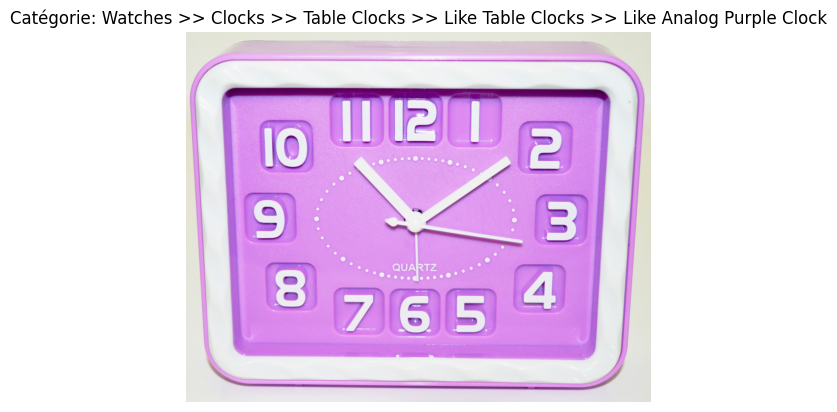

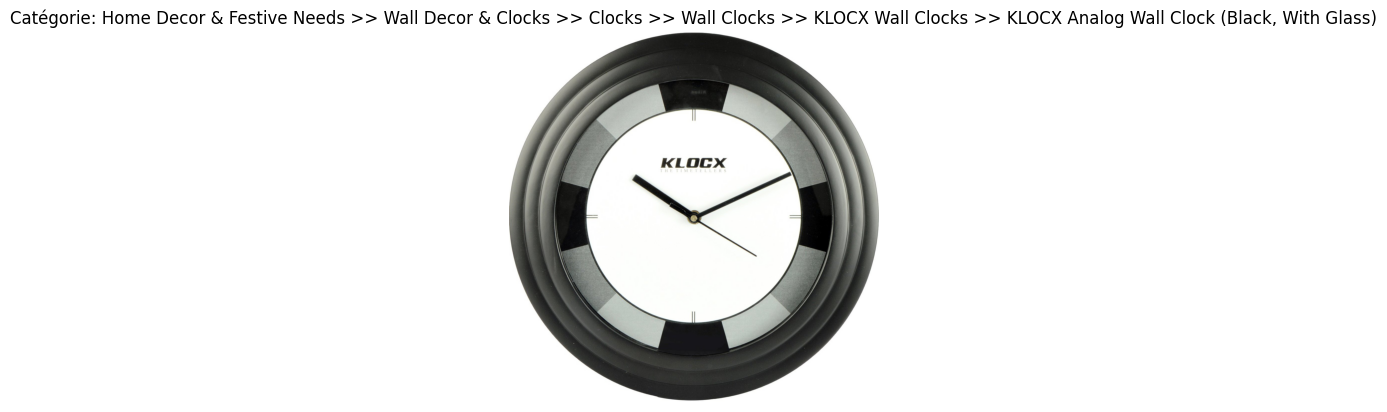

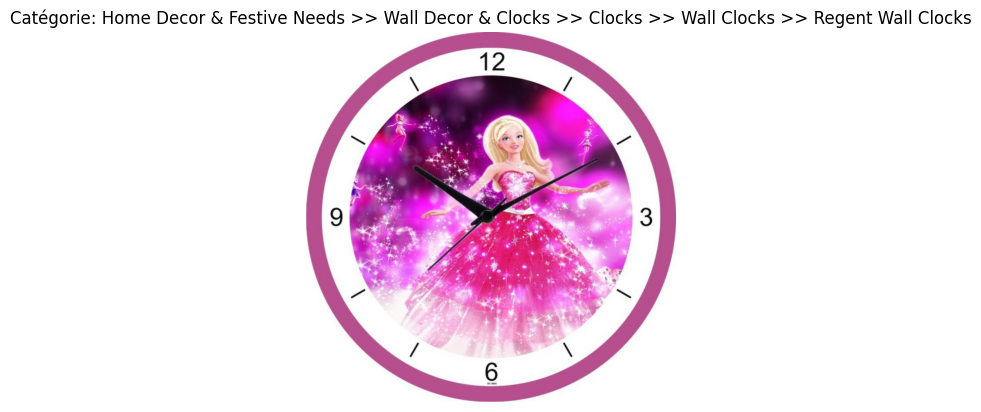

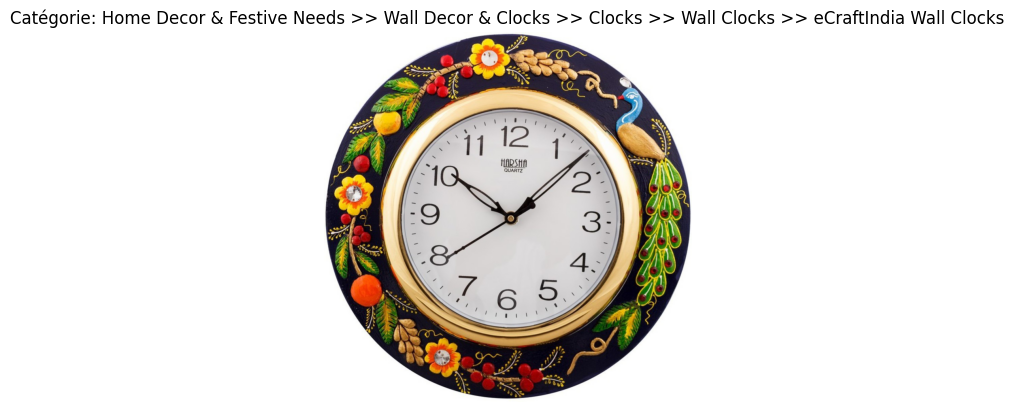

In [18]:
# Chemin du dossier contenant les images
image_folder = './Flipkart/images'
category_name = 'Clocks'  
show_images_by_exact_category(data, category_name, image_folder)

**COMMENTAIRE**

Il y a des sous-catégories 'Clocks' dans plusieurs catégories. Simplement avec les images il n'est pas possible d'identifier la catégorie produit. 

Il y a 1 seul produit dans 'Watches' qui aurai pu être mis avec 'Home Decor'. 

Regardons le descriptif afin d'avoir plus d'information.

**PERSPECTIVE**

Avec simplement la photo, il faudrai pouvoir reclassifier le produit afin d'être plus cohérent et ne pas induire en erreur le modèle de ML.

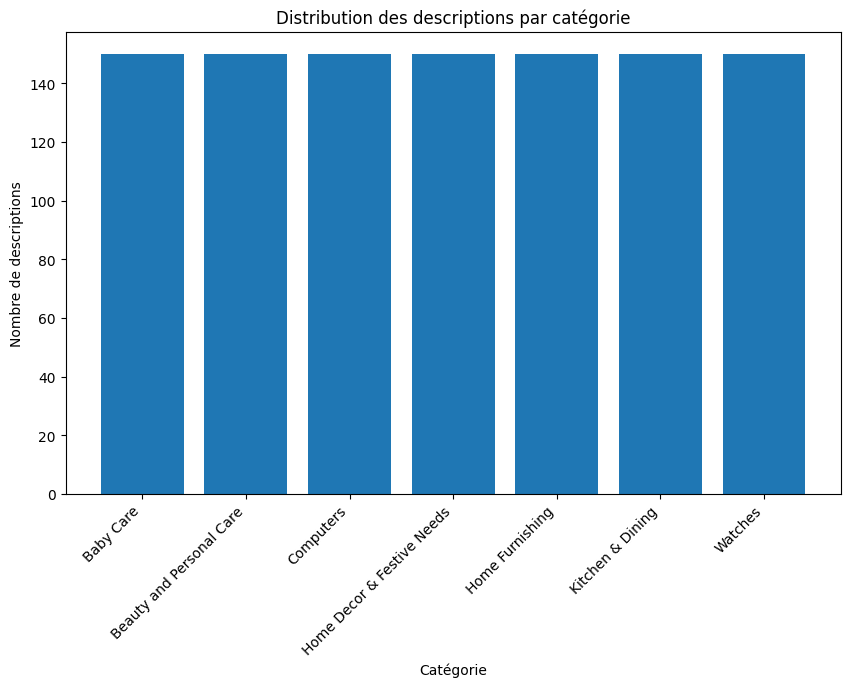

In [19]:
# Grouper par 'cat_product_1' et 'description', puis compter les occurrences
description_distribution = data.groupby('cat_product_1')['description'].count()

# Création du graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(description_distribution.index, description_distribution.values)

# Ajouter des labels et un titre
plt.xlabel('Catégorie')
plt.ylabel('Nombre de descriptions')
plt.title('Distribution des descriptions par catégorie')
plt.xticks(rotation=45, ha='right')  # Rotation des labels de l'axe x pour une meilleure lisibilité

# Afficher le graphique
plt.show()

**COMMENTAIRE**

On remarque une distribution homogene des produits par catégorie. 

## Analyse description

In [20]:
# On regarde une description pour chaque catégorie

# Grouper par 'cat_product_1' et prendre la première description de chaque groupe
first_descriptions = data.groupby('cat_product_1').first().reset_index()

# Afficher le DataFrame résultant
display(first_descriptions[['cat_product_1', 'description']])

cat_product_1  \
0                   Baby Care   
1    Beauty and Personal Care   
2                   Computers   
3  Home Decor & Festive Needs   
4             Home Furnishing   
5            Kitchen & Dining   
6                     Watches   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            description  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

**COMMENTAIRE**

Il y a une description du produit mais aussi des passages plus romancé qui peuvent aussi bien décrire d'autres produits.

On remarque également :
- Majuscule/minuscule sur certains mots et pas d'autres -> a uniformiser
- Il y a des chiffres pour désigner des dimensions(plusieurs metriques cm et inch), prix.. -> on ne gardera pas les nombres mais pourquoi pas les unités de mesures qui peuvent être spécifique à une catégorie (comme Mbps pour Computers)
- Texte en anglais
- Il y a ce qui semble être des références de modèle -> a supprimer
- Il y a des conseils d'utilisation
- Information concernant les modalités de vente (guarantee, shipping, delivery)-> a supprimer 

On va aussi regarder la répartition de la longueur des descriptifs

## Comparaison descriptifs

In [21]:
def plot_avg_description_length_by_category(df, category_level_col='cat_product_1'):
    # Calculer la longueur des descriptifs des produits
    df['description_length'] = df['description'].apply(len)
    
    # Grouper par catégorie et calculer la moyenne des longueurs des descriptifs
    avg_lengths = df.groupby(category_level_col)['description_length'].mean().reset_index()
    
    # Renommer les colonnes pour plus de clarté
    avg_lengths.columns = [category_level_col, 'avg_description_length']
    
    # Générer le graphique à barres
    plt.figure(figsize=(12, 6))
    plt.bar(avg_lengths[category_level_col], avg_lengths['avg_description_length'], color='skyblue')
    plt.xlabel('Catégorie')
    plt.ylabel('Longueur moyenne des descriptifs')
    plt.title('Longueur moyenne des descriptifs par catégorie')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

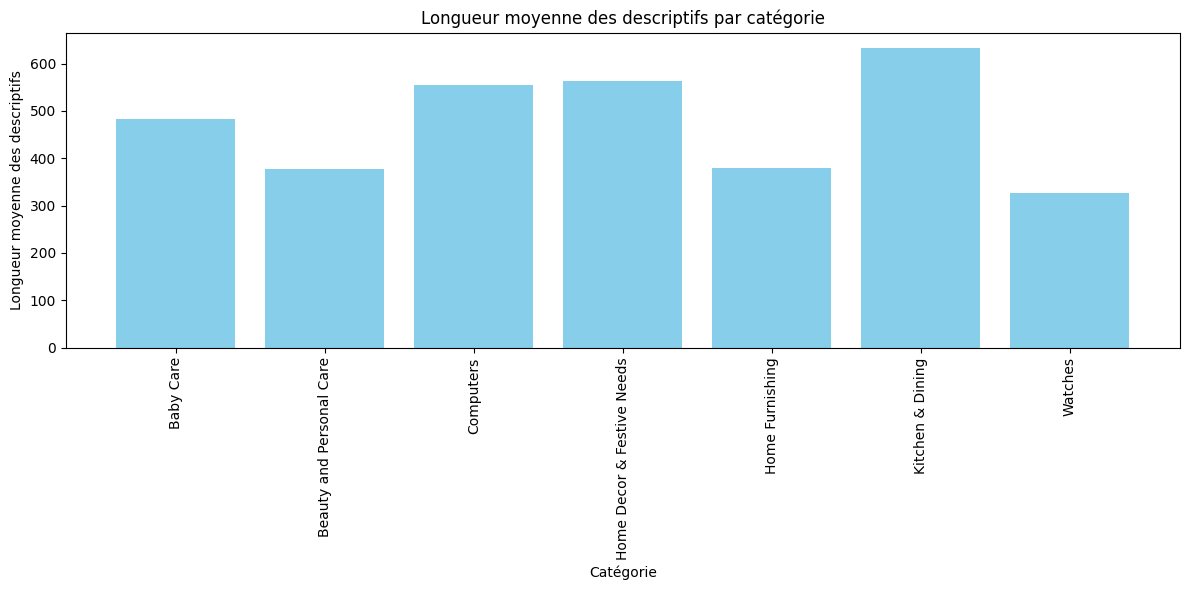

In [22]:
# Appel de la fonction avec votre DataFrame
plot_avg_description_length_by_category(data, category_level_col='cat_product_1')

**COMMENTAIRE**

On remarque que Kitchen & Dining comporte plus de caractères que les autres et watches le moins. Après nettoyage des descriptions nous regarderons si cette donnée est toujours vérifiée.

# Analyse texte

## Traitement lexical

### Nettoyage basique

In [23]:
def clean_text_basic(text):
    # Remplacer tous les caractères non alphanumériques sauf les points par des espaces
    text = re.sub(r'[^a-zA-Z0-9\s.]', ' ', text)
    
    # Coller les points aux mots de gauche et ajouter un espace à droite
    text = re.sub(r'(\w)\.(\w)', r'\1. \2', text)
    text = re.sub(r'(\w)\.(\s)', r'\1. ', text)
    text = re.sub(r'(\s)\.(\w)', r'. \2', text)
    
    # Tokeniser le texte
    words = word_tokenize(text.lower())
    
    # Enlever les mots qui contiennent des chiffres
    words = [word for word in words if not re.search(r'\d', word)]
    
    # Enlever les mots de moins de 2 lettres sauf les points
    words = [word for word in words if len(word) > 1 or word == '.']
    
    return ' '.join(words)

In [24]:
data['description_clean'] = data['description'].apply(clean_text_basic)
display(data[['description','description_clean']].head())

description  \
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel   
2                                                                                                                                                                    Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product is 100% cotton, so it is susceptible to shrinkage. Product color may vary from the picture. Size may vary by ±3% WASH CARE: Wash in cold Water, Do not Iron, Do not Bleach, Flat dry, Wash before first use. SIZE- FACE TOWEL - 23 cms X 23 cms.,Specifications of Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Bath Towel Features Material Cotton Terry Design SHUVAM General Brand Eurospa GS

### Tokenisation

On va tokeniser les descriptions afin de regarder la répartition des mots par catégorie.

In [25]:
# On regarde la fréquence des mots par catégorie

# Initialisez le tokenizer
tokenizer = RegexpTokenizer(r'\w+')

def freq_stats_corpora(df):
    corpora = defaultdict(list)

    for index, row in df.iterrows():
        category = row['cat_product_1']
        description = row['description_clean'].lower()

        # Tokenization et suppression des stopwords en anglais
        tokens = tokenizer.tokenize(description)

        corpora[category] += tokens

    stats, freq = dict(), dict()

    for k, v in corpora.items():
        fq = nltk.FreqDist(v)
        freq[k] = fq
        stats[k] = {'total': len(v), 'unique': len(fq)}

    return freq, stats, corpora

                            total  unique
Kitchen & Dining            14383    1339
Home Decor & Festive Needs  12438    1710
Computers                   12057    1218
Baby Care                   11239    1390
Home Furnishing              8458     957
Beauty and Personal Care     8421    1345
Watches                      6846     545


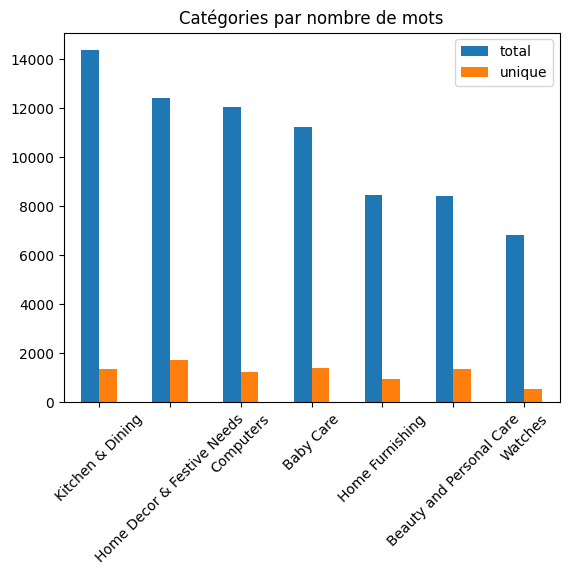

In [26]:
# Récupération des comptages par catégorie
freq, stats, corpora = freq_stats_corpora(data)
df_stats = pd.DataFrame.from_dict(stats, orient='index')

# Affichage des fréquences
df_stats_sorted = df_stats.sort_values(by='total', ascending=False)
print(df_stats_sorted)

# Affichage du graphe des 7 catégories par nombre de mots
df_stats_sorted.head(50).plot(kind='bar', title='Catégories par nombre de mots')
plt.xticks(rotation=45)
plt.show()

**COMMENTAIRE**

On remarque une inégalité entre les catégories, la quantité de mot au total n'est pas homogène entre les catégories.

### Stopwords

Pour la suite du nettoyage des descriptions nous nous interressons aux [stopwords](https://www.linkedin.com/advice/0/what-most-effective-ways-remove-stop-words-from-vtjxc#:~:text=Stop%20words%20are%20common%20words,the%20performance%20of%20ML%20models.) qui permettent de supprimer les mots 'commun' comme 'a' 'and' ect.. 
Le nettoyage grace aux stopword vient compléter le nettoyage basique qui a déjà supprimé les mots de 1 lettre.

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/laurachatard/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
# Liste des stopwords en anglais
stop_words = set(stopwords.words('english'))

In [29]:
# Application des stopwords
def clean_text_stopwords(text):
    # Tokenisation
    words = nltk.word_tokenize(text)
    
    # Suppression des stopwords
    words = [word for word in words if word.lower() not in stop_words]
    
    # Reconstitution du texte nettoyé
    cleaned_text = ' '.join(words)
    return cleaned_text

In [30]:
data['description_clean'] = data['description_clean'].apply(clean_text_stopwords)

In [31]:
display(data[['description','description_clean']].head())

description  \
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel   
2                                                                                                                                                                    Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product is 100% cotton, so it is susceptible to shrinkage. Product color may vary from the picture. Size may vary by ±3% WASH CARE: Wash in cold Water, Do not Iron, Do not Bleach, Flat dry, Wash before first use. SIZE- FACE TOWEL - 23 cms X 23 cms.,Specifications of Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Bath Towel Features Material Cotton Terry Design SHUVAM General Brand Eurospa GS

### Nuage de mots clés

Une fois nos descriptions de produits nettoyer on passer à l'analyse des mots. 

Pour cela, nous allons réaliser des nuages de mots clés afin de faire ressortir les mots importants et qui peuvent avoir un impact important dans la classification.

Nous allons tester 2 techniques le [stemming](https://www.ibm.com/topics/stemming) et la [lemmatisation](https://www.ibm.com/topics/stemming-lemmatization?mhsrc=ibmsearch_a&mhq=lemmatisation). 

#### Stemming

In [32]:
display(data[['description','description_clean']].head())

description  \
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel   
2                                                                                                                                                                    Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product is 100% cotton, so it is susceptible to shrinkage. Product color may vary from the picture. Size may vary by ±3% WASH CARE: Wash in cold Water, Do not Iron, Do not Bleach, Flat dry, Wash before first use. SIZE- FACE TOWEL - 23 cms X 23 cms.,Specifications of Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Bath Towel Features Material Cotton Terry Design SHUVAM General Brand Eurospa GS

In [33]:
# Télécharger les ressources nécessaires de nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/laurachatard/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/laurachatard/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/laurachatard/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [34]:
# Combiner toutes les catégories en une seule chaîne de caractères
text = ' '.join(data['description_clean'])

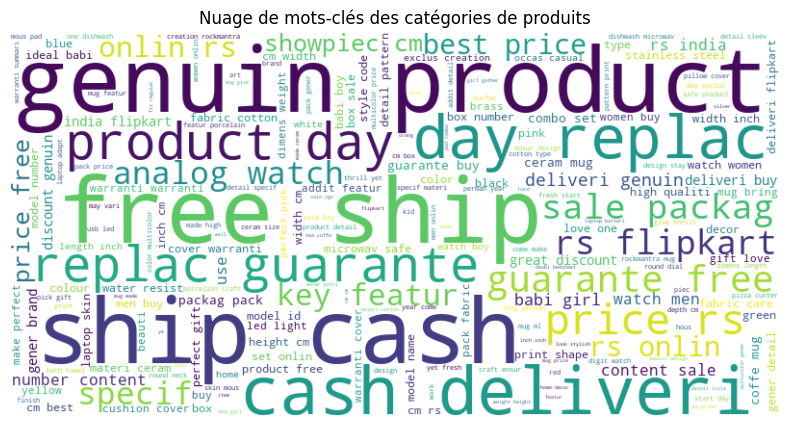

In [35]:
# Tokenizer le texte
words = word_tokenize(text)

# Initialiser le stemmer
stemmer = PorterStemmer()

# Appliquer le stemming à chaque mot
stemmed_words = [stemmer.stem(word) for word in words]

# Recombiner les mots stemmés en une seule chaîne de caractères
stemmed_text = ' '.join(stemmed_words)

# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(stemmed_text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots-clés des catégories de produits')
plt.show()

#### Lemmatization

In [36]:
# Charger le modèle de langue anglaise de spaCy
nlp = spacy.load('en_core_web_sm')

# Traiter le texte
doc = nlp(text)

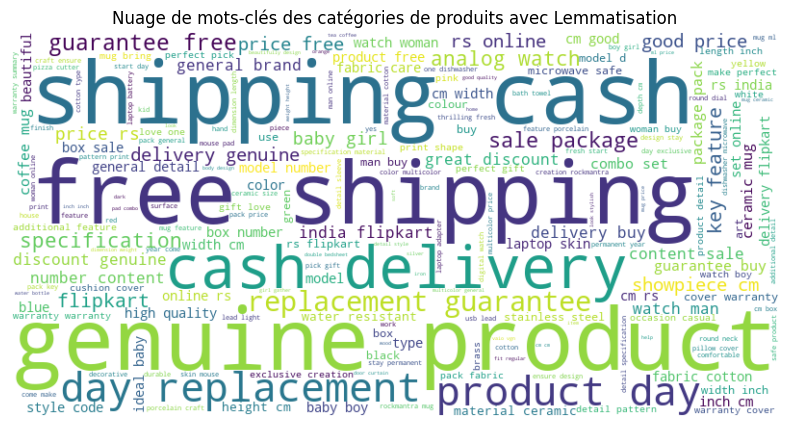

In [37]:
# Extraire les lemmes des tokens
lemmatized_words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

# Recombiner les mots lemmatized en une seule chaîne de caractères
lemmatized_text = ' '.join(lemmatized_words)

# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lemmatized_text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots-clés des catégories de produits avec Lemmatisation')
plt.show()

In [38]:
display(data[['description','description_clean']].head())

description  \
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel   
2                                                                                                                                                                    Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product is 100% cotton, so it is susceptible to shrinkage. Product color may vary from the picture. Size may vary by ±3% WASH CARE: Wash in cold Water, Do not Iron, Do not Bleach, Flat dry, Wash before first use. SIZE- FACE TOWEL - 23 cms X 23 cms.,Specifications of Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Bath Towel Features Material Cotton Terry Design SHUVAM General Brand Eurospa GS

**COMMENTAIRE**

Pour la suite nous choisirons de travailler avec la Lemmatisation pour son approche plus précise.

#### Par catégorie produit

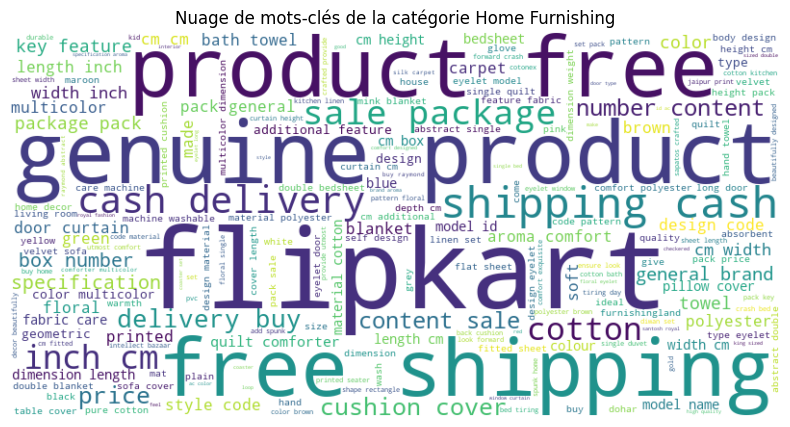

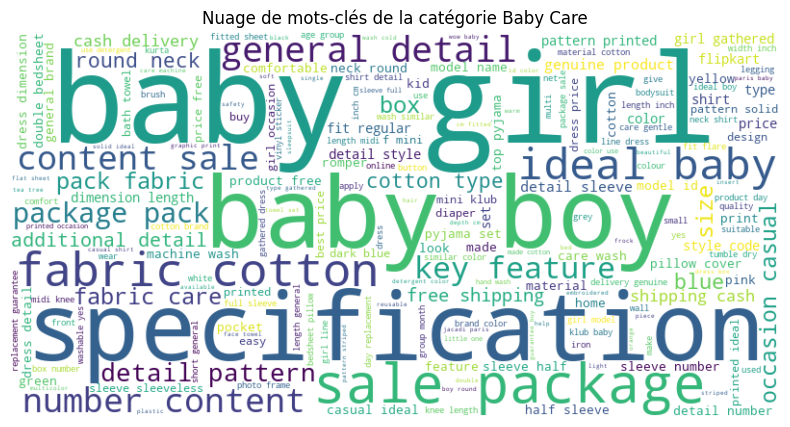

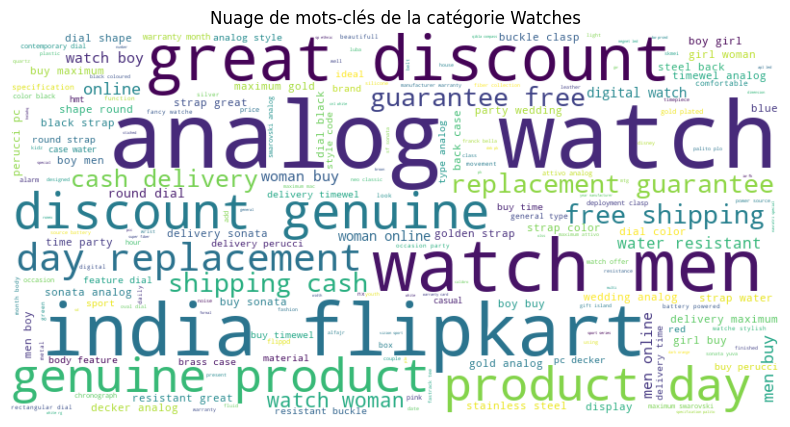

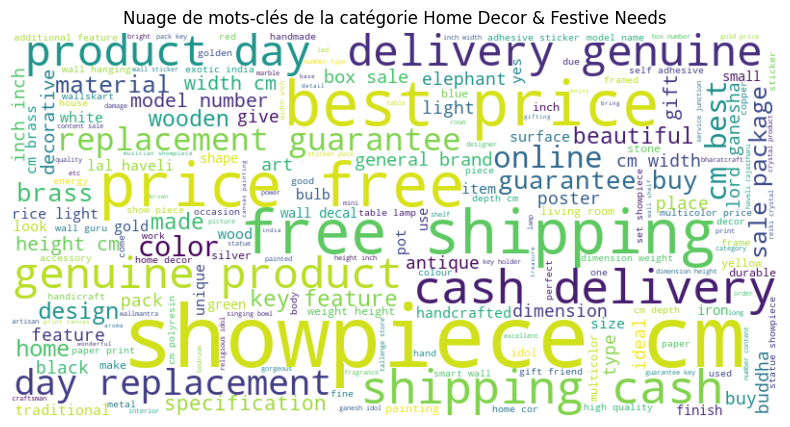

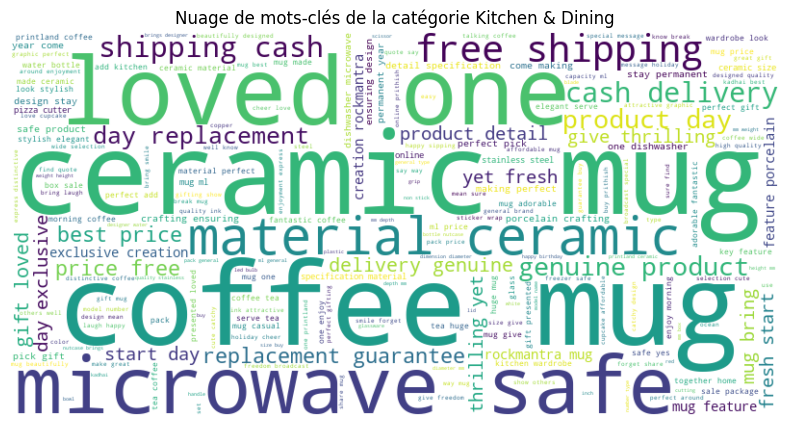

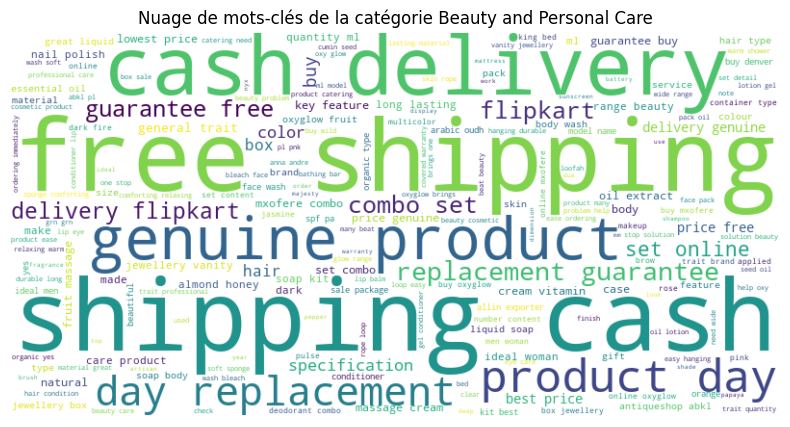

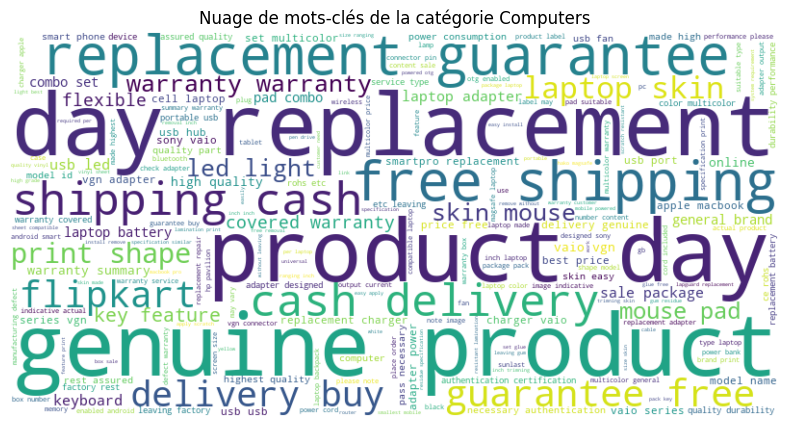

In [39]:
# Initialiser le lemmatizer
lemmatizer = WordNetLemmatizer()

# Fonction pour générer un nuage de mots
def generate_wordcloud(text, title):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lemmatized_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Générer et afficher un nuage de mots pour chaque valeur unique de 'cat_product_1'
for category in data['cat_product_1'].unique():
    sub_df = data[data['cat_product_1'] == category]
    combined_text = ' '.join(sub_df['description_clean'])
    generate_wordcloud(combined_text, f'Nuage de mots-clés de la catégorie {category}')

### Mots unique

En analysant les catégories produits avec le nuage de mot clé on peut constater que les mots 'important' sont pour la plus part des mots 'commun', c'est-à-dire que l'on ne pourrai pas trouver la catégorie produit associé simplement avec ces mots. 

Nous allons donc pousser l'analyse en se concentrant sur les mots unique et commun contenus dans les déscriptions produits.

In [40]:
# Fonction pour trouver les mots uniques à chaque sous-catégorie de cat_product_1
def unique_words_by_subcategory_cat1(df):
    # Initialiser un dictionnaire pour stocker les mots pour chaque sous-catégorie de cat_product_1
    subcategory_words = defaultdict(list)
    
    # Parcourir les descriptions de chaque sous-catégorie et ajouter les mots au dictionnaire
    for category, group in df.groupby('cat_product_1'):
        for description in group['description_clean']:
            subcategory_words[category].extend(word_tokenize(description))
    
    # Initialiser un dictionnaire pour stocker les mots uniques pour chaque sous-catégorie
    unique_words = {}
    
    # Trouver les mots uniques pour chaque sous-catégorie
    for category, words in subcategory_words.items():
        other_words = set()
        for other_category, other_words_list in subcategory_words.items():
            if other_category != category:
                other_words.update(other_words_list)
        unique_words[category] = [word for word in set(words) if word not in other_words]
    
    return unique_words

In [41]:
# Appel de la fonction avec votre DataFrame
unique_words_cat1 = unique_words_by_subcategory_cat1(data)

# Affichage des mots uniques par sous-catégorie
for category, words in unique_words_cat1.items():
    print(f"Catégorie: {category}")
    print("Mots uniques:", words)
    print("")

Catégorie: Baby Care
Mots uniques: ['awaited', 'cure', 'drama', 'contrl', 'restitch', 'mediam', 'piyo', 'bestway', 'xn', 'sleeve', 'twisha', 'pre', 'birds', 'renowned', 'outfit', 'mighty', 'ozone', 'schiffli', 'ollington', 'babyoye', 'shampo', 'frill', 'needybee', 'booties', 'stripped', 'jeggings', 'sathiyas', 'bootie', 'lockable', 'legging', 'reflectively', 'mosquito', 'save', 'miss', 'rounded', 'tblue', 'person', 'mykid', 'lane', 'walldesign', 'holders', 'barrage', 'faqs', 'preferd', 'capri', 'ez', 'acrylic', 'anthill', 'twill', 'packet', 'offspring', 'softener', 'knee', 'tulip', 'foam', 'tresemme', 'camouflage', 'ensemble', 'brnaded', 'dungaree', 'jeans', 'tells', 'softest', 'rack', 'stretchy', 'gaither', 'sleeping', 'instruction', 'growing', 'favorites', 'lilliput', 'cp', 'seals', 'resonable', 'parent', 'excitement', 'greenery', 'muti', 'insert', 'blazer', 'dongli', 'pu', 'stuff', 'discourage', 'sonpra', 'wrapper', 'bow', 'tee', 'brick', 'celsius', 'approx.', 'globe', 'stage', 'nam

In [42]:
# Fonction pour trouver les mots uniques à chaque sous-catégorie
def unique_words_by_subcategory(df, category_name, category_col='cat_product_1', subcategory_col='cat_product_2'):
    # Filtrer le DataFrame pour la catégorie spécifiée
    category_df = df[df[category_col] == category_name]
    
    # Initialiser un dictionnaire pour stocker les mots pour chaque sous-catégorie
    subcategory_words = defaultdict(list)
    
    # Parcourir les descriptions de chaque sous-catégorie et ajouter les mots au dictionnaire
    for subcategory, group in category_df.groupby(subcategory_col):
        for description in group['description_clean']:
            subcategory_words[subcategory].extend(word_tokenize(description))
    
    # Initialiser un dictionnaire pour stocker les mots uniques pour chaque sous-catégorie
    unique_words = {}
    
    # Trouver les mots uniques pour chaque sous-catégorie
    for subcategory, words in subcategory_words.items():
        other_words = set()
        for other_subcategory, other_words_list in subcategory_words.items():
            if other_subcategory != subcategory:
                other_words.update(other_words_list)
        unique_words[subcategory] = [word for word in set(words) if word not in other_words]
    
    return unique_words

In [43]:
# Appel de la fonction avec votre DataFrame
category_name = "Home Furnishing"
unique_words = unique_words_by_subcategory(data, category_name, category_col='cat_product_1',
                                           subcategory_col='cat_product_2')

# Affichage des mots uniques par sous-catégorie
for subcategory, words in unique_words.items():
    print(f"Sub-catégorie: {subcategory}")
    print("Mots uniques:", words)
    print("")

Sub-catégorie: Bath Linen
Mots uniques: ['holds', 'push', 'especially', 'medium', 'hundreds', 'towels', 'towel', 'trident', 'wrap', 'daily', 'iws', 'shag', 'fading', 'branded', 'navy', 'held', 'terry', 'horizontal', 'machines', 'beach', 'quick', 'luxury', 'highly', 'amit', 'skin', 'lines', 'trick', 'removed', 'sassoon', 'upgrade', 'bagru', 'blades', 'shower', 'render', 'primary', 'threads', 'tufting', 'rows', 'tufts', 'specialized', 'lukluck', 'trendz', 'exclusive', 'might', 'several', 'bacteria', 'form', 'needles', 'mandhania', 'addition', 'drying', 'copenhagen', 'durga', 'nkp', 'woven', 'jums', 'caught', 'easily', 'absorbing', 'percent', 'casa', 'kind', 'kids', 'traumatic', 'go', 'separately', 'sewing', 'process', 'pamper', 'mafatlal', 'maspar', 'applied', 'creating', 'pile', 'last', 'smooth', 'secondary', 'therefore', 'bathmat', 'classic', 'face', 'ferrari', 'riva', 'short', 'ribbed', 'tuft', 'refreshing', 'loopers', 'havein', 'ri', 'either', 'simple', 'mat', 'backings', 'hundred', 

**COMMENTAIRE**

Regardons les mots uniques qui reviennent le plus par catégorie

In [44]:
display(data[['description_clean']].head())

description_clean
0  key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain cm height pack price rs . curtain enhances look interiors . curtain made high quality polyester fabric . features eyelet style stitch metal ring . makes room environment romantic loving . curtain ant wrinkle anti shrinkage elegant apparance . give home bright modernistic appeal designs . surreal attention sure steal hearts . contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints . bring home elegant curtain softly filters light room get right amount sunlight . specifications elegance polyester multicolor abstract eyelet door curtain cm height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model id color multicolor dimensions length cm box number contents sales package pack sales package curtains body design material polyester
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          specifications sathiyas cotton bath towel bath towel red yellow blue bath towel features machine washable yes material cotton design self design general brand sathiyas type bath towel gsm model name sathiyas cotton bath towel ideal men women boys girls model id color red yellow blue size mediam dimensions length inch width inch box number contents sales package sales package bath towel
2                                                                                                                                                   key features eurospa cotton terry face towel set size small height inch gsm eurospa cotton terry face towel set piece face towel set assorted price rs . eurospa brings exclusively designed soft cotton towels export quality . products soft texture takes care skin gives enriched feeling deserve . eurospa exporting bath towels lot renowned brands last years famous fine prints absorbency softness durability . note product cotton susceptible shrinkage . product color may vary picture . size may vary wash care wash cold water iron bleach flat dry wash first use . size face towel cms cms . specifications eurospa cotton terry face towel set piece face towel set assorted bath towel features material cotton terry design shuvam general brand eurospa gsm type face towel set model name ideal boys girls men women model id size small color assorted dimensions weight length inch width inch box number contents sales package sales package piece face towel set
3                                                                                                                                                                                                                                                                                                                                                                 key features santosh royal fashion cotton printed king sized double bedsheet royal bedsheet perfact wedding gifting specifications santosh royal fashion cotton printed king sized double bedsheet bedsheet pillow cover multicolor general brand santosh royal fashion machine washable yes type flat material cotton model

In [45]:
from collections import defaultdict, Counter

# Fonction pour trouver les mots uniques et les 10 plus fréquents pour chaque catégorie de niveau 1
def unique_words_by_category(df, category_col='cat_product_1'):
    # Initialiser un dictionnaire pour stocker les mots pour chaque catégorie de niveau 1
    category_words = defaultdict(list)
    
    # Parcourir les descriptions de chaque catégorie de niveau 1 et ajouter les mots au dictionnaire
    for category, group in df.groupby(category_col):
        for description in group['description_clean']:
            category_words[category].extend(word_tokenize(description))
    
    # Initialiser un dictionnaire pour stocker les mots uniques pour chaque catégorie de niveau 1
    unique_words = {}
    
    # Trouver les mots uniques pour chaque catégorie de niveau 1
    for category, words in category_words.items():
        other_words = set()
        for other_category, other_words_list in category_words.items():
            if other_category != category:
                other_words.update(other_words_list)
        
        # Filtrer les mots uniques
        unique_words[category] = [word for word in words if word not in other_words]
    
    # Compter les occurrences des mots uniques et sélectionner les 10 plus fréquents
    top_unique_words = {}
    for category, words in unique_words.items():
        word_counts = Counter(words)
        top_words = word_counts.most_common(10)
        top_unique_words[category] = top_words
    
    return top_unique_words

# Exemple d'utilisation de la fonction avec votre DataFrame
top_unique_words = unique_words_by_category(data)

# Afficher les résultats
for category, words in top_unique_words.items():
    print(f"Catégorie: {category}")
    print("Top 10 mots uniques les plus fréquents:")
    for word, count in words:
        print(f"{word}: {count}")
    print()

Catégorie: Baby Care
Top 10 mots uniques les plus fréquents:
dress: 105
sleeve: 80
shirt: 61
gathered: 38
shorts: 30
little: 23
pyjama: 22
half: 20
sleeveless: 18
bodysuit: 16

Catégorie: Beauty and Personal Care
Top 10 mots uniques les plus fréquents:
lip: 25
oxyglow: 23
organic: 21
conditioner: 20
vanity: 20
massage: 20
lowest: 17
vitamin: 17
extract: 16
mxofere: 16

Catégorie: Computers
Top 10 mots uniques les plus fréquents:
laptop: 214
usb: 174
adapter: 116
charger: 62
vaio: 53
vgn: 53
mouse: 46
smartpro: 44
fan: 36
lapguard: 33

Catégorie: Home Decor & Festive Needs
Top 10 mots uniques les plus fréquents:
ganesha: 36
lord: 29
buddha: 26
statue: 25
idol: 25
poster: 24
rice: 21
canvas: 19
lal: 16
haveli: 16

Catégorie: Home Furnishing
Top 10 mots uniques les plus fréquents:
eyelet: 44
curtain: 42
cushion: 36
carpet: 35
cushions: 34
quilt: 24
duvet: 23
quilts: 23
comforters: 21
cotonex: 16

Catégorie: Kitchen & Dining
Top 10 mots uniques les plus fréquents:
mugs: 130
rockmantra: 65


### Mots commun

In [46]:
# On regarde les catégories qui comporte le plus de mot 'romancés'

def count_words_in_categories(df, words_list):
    # Créer un dictionnaire pour stocker les comptages de mots par catégorie
    word_counts = defaultdict(int)
    
    # Parcourir chaque catégorie
    for category in df['cat_product_1'].unique():
        # Filtrer le dataframe pour la catégorie courante
        category_df = df[df['cat_product_1'] == category]
        
        # Compter les occurrences des mots dans les descriptions de la catégorie courante
        count = sum(category_df['description_clean'].apply(lambda x: sum(word in x for word in words_list)))
        
        # Stocker le comptage dans le dictionnaire
        word_counts[category] = count
    
    return word_counts

def plot_word_counts(word_counts):
    # Convertir le dictionnaire en DataFrame pour faciliter l'affichage
    word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
    
    # Trier les catégories par nombre de mots
    word_counts_df = word_counts_df.sort_values(by='count', ascending=False)
    
    # Générer le graphique à barres
    plt.figure(figsize=(12, 8))
    sns.barplot(x=word_counts_df.index, y=word_counts_df['count'], palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel('Catégories')
    plt.ylabel('Nombre de mots')
    plt.title('Nombre de mots par catégorie')
    plt.show()

def analyze_word_counts(df, words_list):
    # Compter les mots dans les descriptions par catégorie
    word_counts = count_words_in_categories(df, words_list)

    # Afficher le graphique à barres
    plot_word_counts(word_counts)

/var/folders/sg/93kbc44x3dz8s65w44mhwm100000gn/T/ipykernel_33825/1780290917.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_counts_df.index, y=word_counts_df['count'], palette='viridis')


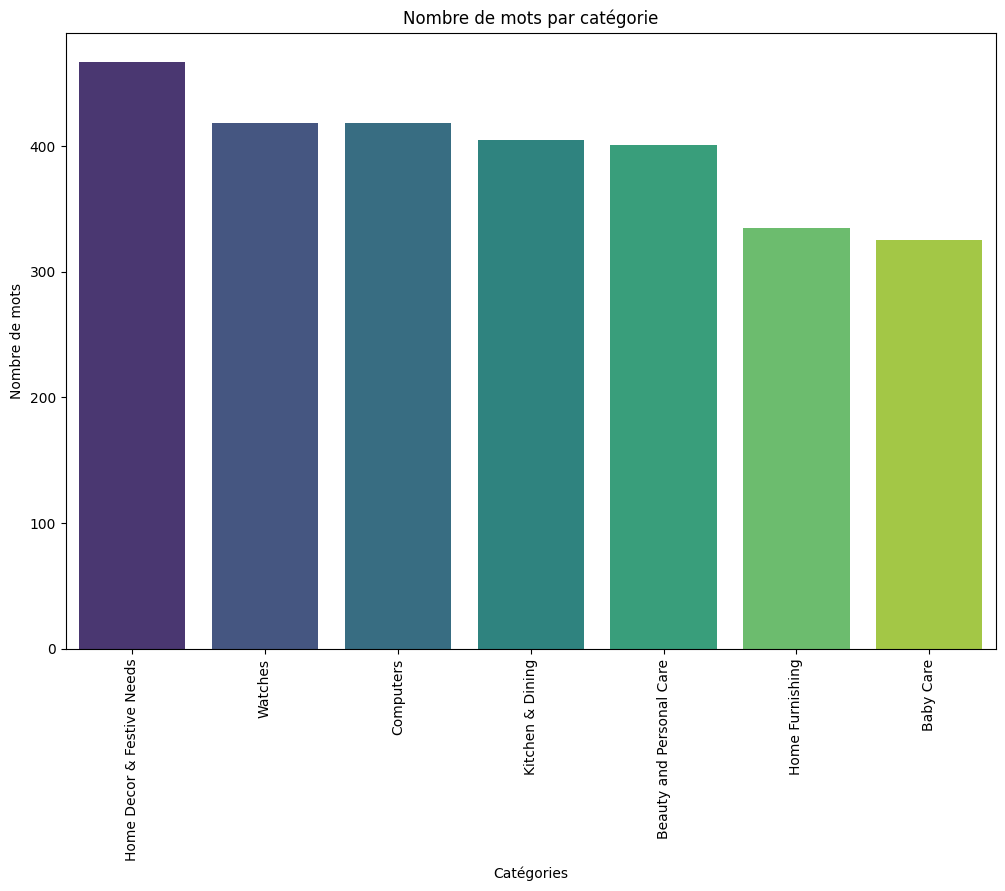

In [47]:
# Liste des mots romancés
words_list = ['nice', 'modernistic', 'romantic', 'loving','comfort', 'shipping',
              'package', 'sales', 'feeling', 'price', 'delivery', 'gift', 'guarantee']

# Analyser les comptages de mots et afficher le graphique
analyze_word_counts(data, words_list)

**COMMENTAIRE**

On peut déjà remarquer avec ces quelques mots issus du nuage de mot que des catégories se distinguent par leurs vocabulaire commun.

In [48]:
def extract_sentences_with_words(df, words_list, num_sentences=5):
    # Dictionnaire pour stocker les phrases trouvées avec leurs catégories
    found_sentences = defaultdict(Counter)
    
    # Parcourir chaque description et sa catégorie associée dans le DataFrame
    for index, row in df.iterrows():
        category = row['cat_product_1']
        description = row['description_clean']
        
        # Diviser la description en phrases
        sentences = nltk.tokenize.sent_tokenize(description)
        
        # Parcourir chaque phrase pour vérifier si elle contient un mot de words_list
        for sentence in sentences:
            # Vérifier si un mot de words_list est dans la phrase
            if any(word in sentence for word in words_list):
                found_sentences[category][sentence.strip()] += 1
    
    # Afficher les 10 premières phrases trouvées avec leurs catégories
    total_sentences = 0
    for category, sentences_counter in found_sentences.items():
        total_sentences += sum(sentences_counter.values())
        print(f"Catégorie: \033[1m{category}\033[0m (Nombre de phrases: {sum(sentences_counter.values())})")
        for sentence, count in sentences_counter.most_common(num_sentences):
            if count > 1:
                print(f"Phrase: {sentence} \033[94m(Apparaît {count} fois)\033[0m")
            else:
                print(f"Phrase: {sentence}")
            print()  # Ligne d'espace
    
    # Afficher le nombre total de phrases trouvées
    print(f"Nombre total de phrases trouvées: {total_sentences}")
    
    # Retourner toutes les phrases trouvées avec leurs catégories
    return found_sentences

In [49]:
# Extraire et afficher les phrases contenant les mots de words_list
found_sentences = extract_sentences_with_words(data, words_list)

Catégorie: Home Furnishing (Nombre de phrases: 302)
Phrase: free shipping . (Apparaît 74 fois)

Phrase: cash delivery (Apparaît 74 fois)

Phrase: crafted provide utmost comfort exquisite quilt ensure look forward crash bed tiring day . (Apparaît 4 fois)

Phrase: crafted provide utmost comfort exquisite duvet ensure look forward crash bed tiring day . (Apparaît 4 fois)

Phrase: key features prime printed seater table cover length inch cm width inch cm prime printed seater table cover multicolor pvc price rs . (Apparaît 2 fois)

Catégorie: Baby Care (Nombre de phrases: 222)
Phrase: free shipping . (Apparaît 20 fois)

Phrase: cash delivery (Apparaît 20 fois)

Phrase: day replacement guarantee . (Apparaît 14 fois)

Phrase: made cotton rompers ensure whole day comfort . (Apparaît 2 fois)

Phrase: cotton plastic diaper name tells nappy lil one cotton fabric outside plastic inside pad make baby feel comfortable suitable size child months . (Apparaît 2 fois)

Catégorie: Watches (Nombre de phra

**COMMENTAIRE**

On peut supprimer les phrases sans intéret.

In [50]:
def clean_text_sentence(text, sentences_to_remove):
    # Tokenisation en phrases
    sentences = nltk.tokenize.sent_tokenize(text)
    
    # Filtrer les phrases à supprimer
    cleaned_sentences = [sentence for sentence in sentences if sentence.strip() not in sentences_to_remove]
    
    # Reconstituer le texte sans les phrases supprimées
    cleaned_text = ' '.join(cleaned_sentences)
    
    return cleaned_text

In [51]:
sentences_to_remove = [sentence for category, sentences in found_sentences.items() for sentence in sentences]
cleaned_text = clean_text_sentence(text, sentences_to_remove)

## Fonctions

In [1]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features, l_cat, y_cat_num):
    time1 = time.time()
    num_labels = len(l_cat)
    
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                         init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_), 4)
    time2 = np.round(time.time() - time1, 0)
    
    print("ARI : ", ARI, "time : ", time2, "s")
    
    return ARI, X_tsne, cls.labels_

In [53]:
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, l_cat):
    # Encoder les catégories en nombres pour la coloration
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    
    fig, axs = plt.subplots(2, 2, figsize=(18, 12), gridspec_kw={'height_ratios': [2, 1]})
    
    # Premier graphique : Représentation des descriptions par catégories réelles
    scatter1 = axs[0, 0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_cat_num, cmap='Set1')
    handles1, _ = scatter1.legend_elements()
    legend1 = axs[0, 0].legend(handles1, l_cat, loc='upper center', title="Catégories", ncol=1)
    axs[0, 0].add_artist(legend1)
    axs[0, 0].set_title('Représentation des descriptions par catégories réelles')
    
    # Deuxième graphique : Représentation des descriptions par clusters
    scatter2 = axs[0, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=encoded_labels, cmap='Set1')
    handles2, _ = scatter2.legend_elements()
    legend2 = axs[0, 1].legend(handles2, set(encoded_labels), loc='upper center', title="Clusters", ncol=1)
    axs[0, 1].add_artist(legend2)
    axs[0, 1].set_title('Représentation des descriptions par clusters')
    
    # Troisième graphique : Matrice de confusion
    y_pred_transform, df_cm = conf_mat_transform(y_cat_num, encoded_labels, 
                                                 l_cat, l_cat, axs[1, 1], set(encoded_labels))
    
    # Supprimer le quatrième subplot vide
    fig.delaxes(axs[1, 0])
    
    plt.tight_layout()
    plt.show()

In [54]:
def conf_mat_transform(y_true, y_pred, l_cat, class_labels, ax, labels):
    """
    Transforme les étiquettes prédites pour correspondre aux vraies catégories 
    en maximisant les valeurs sur la diagonale de la matrice de confusion.

    Args:
    - y_true: Étiquettes réelles
    - y_pred: Étiquettes prédites
    - l_cat: Liste des catégories pour la transformation des labels
    - class_labels: Étiquettes réelles sous forme de chaînes pour l'affichage
    - ax: L'axe matplotlib sur lequel tracer la matrice de confusion
    - labels: Étiquettes des clusters

    Returns:
    - y_pred_transform: Étiquettes prédites transformées pour correspondre aux vraies catégories
    """
    # Calcul de la matrice de confusion
    conf_mat = metrics.confusion_matrix(y_true, y_pred)
    print("Matrice de confusion originale:\n", conf_mat)
    
    # Création de la matrice de coût pour trouver la meilleure correspondance
    cost_matrix = -conf_mat  # On maximise sur la diagonale en minimisant le coût
    
    # Trouver la meilleure permutation des colonnes pour maximiser les valeurs sur la diagonale
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    
    # Réordonner les colonnes de la matrice de confusion en fonction de la meilleure permutation
    conf_mat_transformed = conf_mat[:, col_ind]
    print("Matrice de confusion transformée:\n", conf_mat_transformed)
    
    # Créer un mappage entre les clusters et les vraies catégories
    cluster_to_category = {i: col_ind[i] for i in range(len(col_ind))}
    
    # Transformer les étiquettes prédites pour qu'elles correspondent aux vraies catégories
    y_pred_transform = np.array([cluster_to_category[cluster] for cluster in y_pred])
    
    # Assurez-vous que `labels` est une liste
    if isinstance(labels, set):
        labels = list(labels)
    
    # Création d'un DataFrame pour une meilleure visualisation
    df_cm = pd.DataFrame(conf_mat_transformed, index=class_labels, columns=labels)
    
    # Affichage de la matrice de confusion
    sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='d', ax=ax)
    ax.set_xlabel('Prédictions')
    ax.set_ylabel('Vérités terrain')
    ax.set_title('Matrice de confusion')

    return y_pred_transform, df_cm

## Compratifs des approches NLP

![Comparatif des approches NLP](comparatif_approche_nlp.png)


## BAG OF WORD & TF-IDF

**Bag of Words (CountVectorizer)**

_Avantages :_
Simple et facile à comprendre.
Représentation directe de la fréquence des mots.

_Inconvénients :_
Ne prend pas en compte la fréquence inverse des documents, ce qui peut entraîner une importance excessive des mots courants.
La matrice de caractéristiques peut être très grande et clairsemée.

**Tf-idf (TfidfVectorizer)**

_Avantages :_
Réduit l'importance des mots courants, permettant aux mots moins fréquents mais significatifs d'avoir plus de poids.
Généralement plus efficace pour capturer les caractéristiques discriminantes des textes.

_Inconvénients :_
Un peu plus complexe à comprendre et à mettre en œuvre.
Peut nécessiter des ajustements de paramètres pour obtenir les meilleurs résultats.


**Initialisation et Transformation :**

- Nous appliquons CountVectorizer et TfidfVectorizer aux descriptions nettoyées pour créer des matrices de caractéristiques.

**Calcul de l'ARI et Visualisation TSNE :**

- Nous passons les matrices de caractéristiques à la fonction ARI_fct qui calcule le score ARI et les clusters.

- Nous visualisons les résultats à l'aide de TSNE_visu_fct pour les deux représentations (Bag of Words et Tf-idf).

In [55]:
def create_bag_of_words(data):
    descriptions = data['description_clean']
    categories = data['cat_product_1']
    
    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(descriptions, categories, test_size=0.4, random_state=42)
    
    # Initialiser les vectoriseurs
    c_vectorizer = CountVectorizer()
    tf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=1)
    
    # Appliquer les vectoriseurs sur la colonne des descriptions de l'ensemble d'entraînement
    c_transform_train = c_vectorizer.fit_transform(X_train)
    c_transform_test = c_vectorizer.transform(X_test)
    
    tf_transform_train = tf_vectorizer.fit_transform(X_train)
    tf_transform_test = tf_vectorizer.transform(X_test)
    
    # Obtenir les catégories uniques et les labels numériques
    l_cat = list(categories.unique())
    y_train_num = y_train.apply(lambda x: l_cat.index(x))
    y_test_num = y_test.apply(lambda x: l_cat.index(x))
    
    # Visualisation et calcul de l'ARI pour CountVectorizer sur l'ensemble de test
    print("CountVectorizer : ")
    print("-----------------")
    ARI, X_tsne, labels = ARI_fct(c_transform_test, l_cat, y_test_num)
    TSNE_visu_fct(X_tsne, y_test_num, labels, ARI, l_cat)
    print()

    # Visualisation et calcul de l'ARI pour Tf-idf sur l'ensemble de test
    print("Tf-idf : ")
    print("--------")
    ARI, X_tsne, labels = ARI_fct(tf_transform_test, l_cat, y_test_num)
    TSNE_visu_fct(X_tsne, y_test_num, labels, ARI, l_cat)

CountVectorizer : 
-----------------
ARI :  0.3841 time :  3.0
Matrice de confusion originale:
 [[ 2  2 28  0 19 17  0]
 [ 0 33  8  0 10  3  3]
 [ 0  0  0 68  1  0  0]
 [ 1  2 11  0  6 39  3]
 [ 8 13 13  0 13  1  4]
 [37  2  2  0 11  0  0]
 [ 2  0  0  0 33  2 23]]
Matrice de confusion transformée:
 [[28  2  0 17  0  2 19]
 [ 8 33  0  3  3  0 10]
 [ 0  0 68  0  0  0  1]
 [11  2  0 39  3  1  6]
 [13 13  0  1  4  8 13]
 [ 2  2  0  0  0 37 11]
 [ 0  0  0  2 23  2 33]]


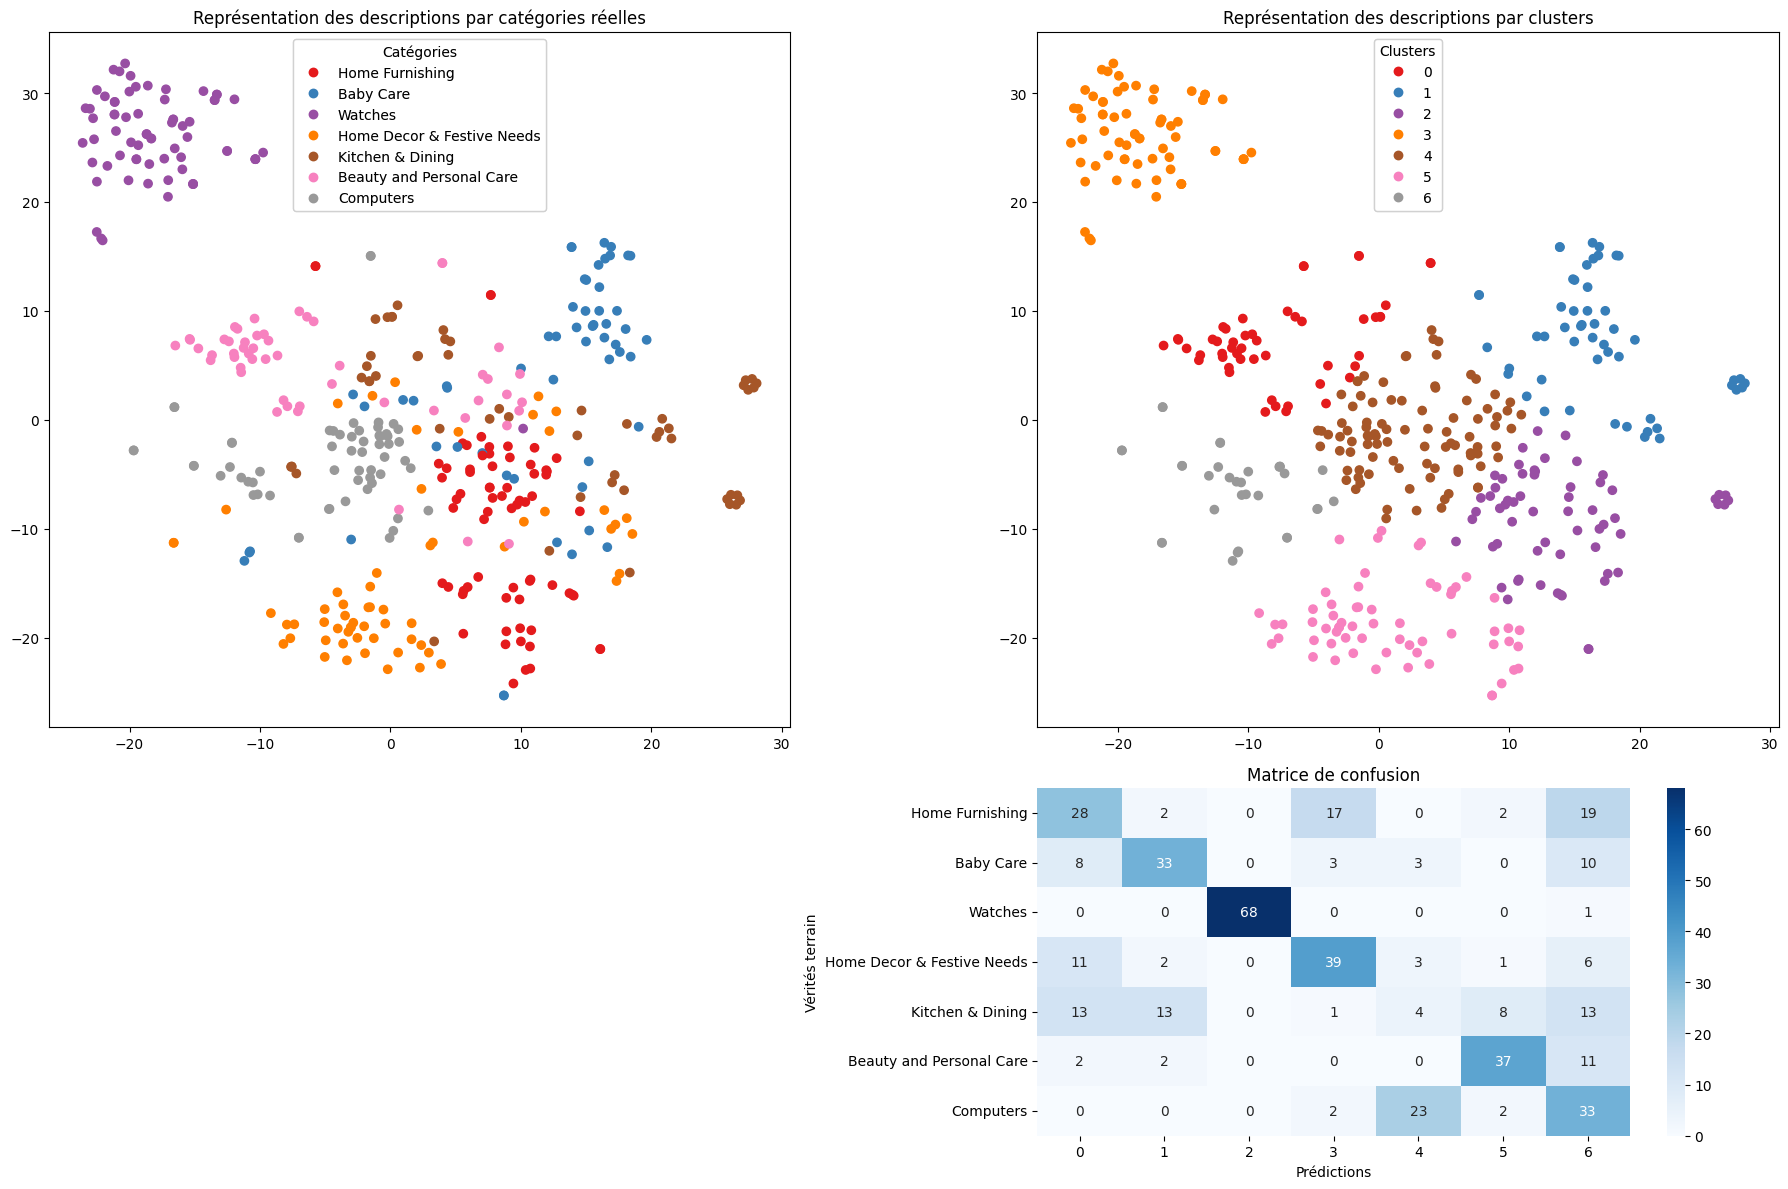


Tf-idf : 
--------
ARI :  0.4469 time :  2.0
Matrice de confusion originale:
 [[11 30  0  4  0  0 23]
 [ 2 10  0 36  4  1  4]
 [ 0  0 69  0  0  0  0]
 [ 3  0  0  0 45  4 10]
 [32  0  0  1  1  9  9]
 [ 2 37  2  6  2  1  2]
 [ 3 14  0  0  0 34  9]]
Matrice de confusion transformée:
 [[23  4  0  0 11 30  0]
 [ 4 36  0  4  2 10  1]
 [ 0  0 69  0  0  0  0]
 [10  0  0 45  3  0  4]
 [ 9  1  0  1 32  0  9]
 [ 2  6  2  2  2 37  1]
 [ 9  0  0  0  3 14 34]]


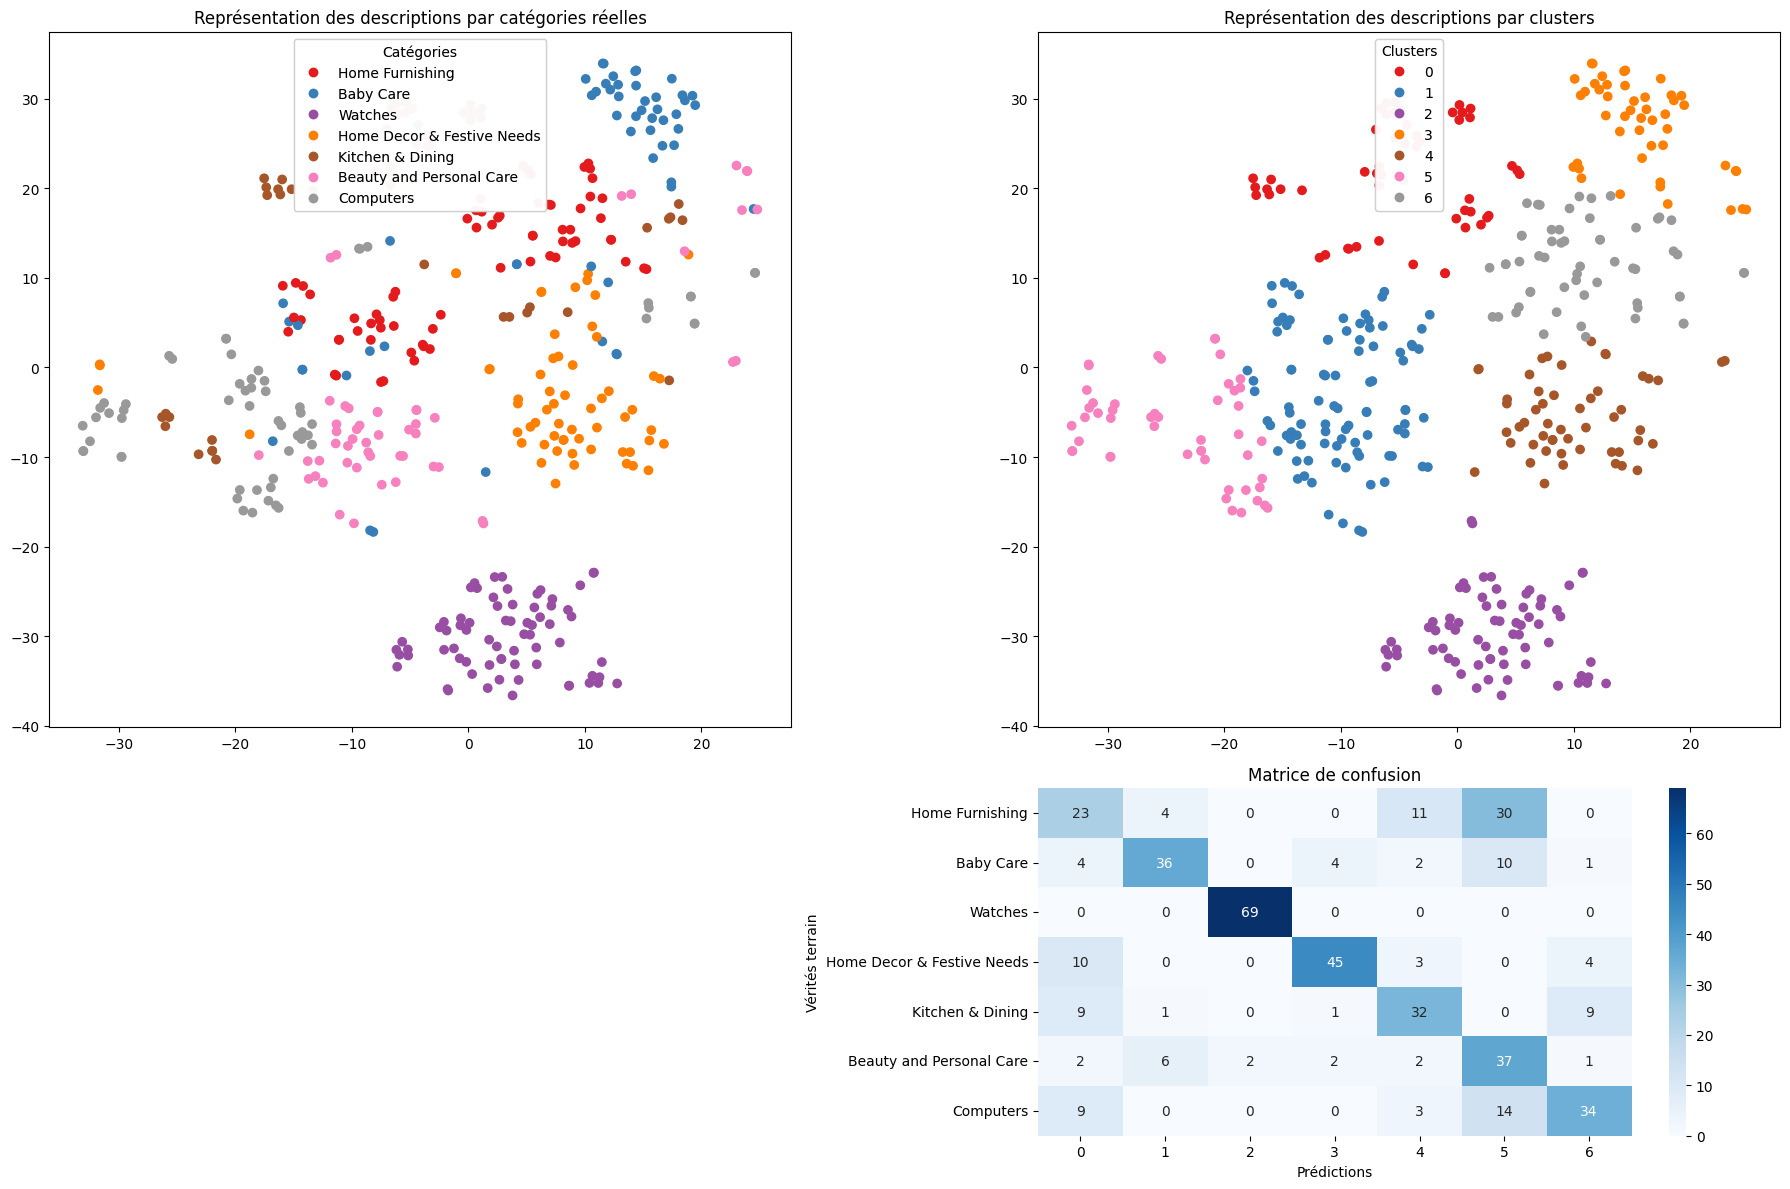

In [56]:
# Créer la représentation Bag of Words
bow_df = create_bag_of_words(data)

### Synthèse

**Bag of Word**

- La visualisation T-SNE des catégories réelles est mitigiée, 2 catégories sont regroupées et séparéés (Watches et Beauty and personal care), en revanche les autres catégories se mélangent. On peut dire que la réduction de dimension et d'une qualité plutôt moyenne. 
Les clusters sont quant à eux mieux définis mais restent pour certains proches les uns des autres.

- L'analyse de la visualisation est confirmée par le score ARI qui est de 0,45. 

**TF-IDF**

- La visualisation T-SNE montre des catégories plus éloignés les unes des autres mais moins bien regroupés.

- Le score ARI est un peu mieux que pour Bag of Word

## WORD2VEC

Word2Vec est une technique d'apprentissage profond pour la représentation des mots en vecteurs de caractéristiques continus. Contrairement à des techniques comme Bag of Words ou TF-IDF qui créent des représentations très dimensionnelles et clairsemées des textes, Word2Vec crée des vecteurs denses où des mots similaires ont des représentations similaires dans l'espace de caractéristiques.

### Entraînement du modèle Word2Vec

In [57]:
# Tokenisation des phrases avec RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
sentences = [tokenizer.tokenize(sentence.lower()) for sentence in data['description_clean']]

In [58]:
# Construction de l'index des mots
word_counts = Counter(word for sentence in sentences for word in sentence)
word_index = {word: idx + 1 for idx, (word, _) in enumerate(word_counts.most_common())}

In [59]:
sequences = [[word_index[word] for word in sentence if word in word_index] for sentence in sentences]

In [60]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data['cat_product_1'])

In [61]:
vocab_size = len(word_index) + 1
maxlen = 20
embedding_dims = [50, 100, 200, 300]
num_classes = len(set(labels))

In [62]:
maxlen = 20  # Longueur maximale des séquences
X = pad_sequences(sequences, maxlen=maxlen, padding='post')
y = to_categorical(labels, num_classes=len(label_encoder.classes_))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Fonction pour créer le modèle d'embedding
def create_embedding_model(vocab_size, embedding_dim, maxlen, num_classes):
    word_input = Input(shape=(maxlen,), dtype='int32')
    word_embedding = Embedding(input_dim=vocab_size,
                               output_dim=embedding_dim)(word_input)
    word_vec = GlobalAveragePooling1D()(word_embedding)
    output = Dense(num_classes, activation='softmax')(word_vec)  # Ajout de la couche de sortie
    embed_model = Model(inputs=[word_input], outputs=[output])
    return embed_model

# Expérimentation avec différentes dimensions d'embedding
best_embedding_dim = 0
best_accuracy = 0

for embedding_dim in embedding_dims:
    model = create_embedding_model(vocab_size, embedding_dim, maxlen, num_classes)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Entraînement du modèle
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    
    # Évaluation des performances
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_val_classes = np.argmax(y_val, axis=1)
    accuracy = accuracy_score(y_val_classes, y_pred_classes)
    
    print(f"Embedding Dimension: {embedding_dim}, Accuracy: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_embedding_dim = embedding_dim

print(f"La meilleure dimension d'embedding est {best_embedding_dim} avec une précision de {best_accuracy:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Embedding Dimension: 50, Accuracy: 0.8619
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Embedding Dimension: 100, Accuracy: 0.8810
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Embedding Dimension: 200, Accuracy: 0.8857
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Embedding Dimension: 300, Accuracy: 0.8905
La meilleure dimension d'embedding est 300 avec une précision de 0.89


In [64]:
# Paramètres du modèle Word2Vec
w2v_size = 300
w2v_window = 5
w2v_min_count = 1
w2v_epochs = 100

# Initialiser et entraîner le modèle Word2Vec
w2v_model = gensim.models.Word2Vec(
    sentences,
    vector_size=w2v_size,
    window=w2v_window,
    min_count=w2v_min_count,
    epochs=w2v_epochs
)

# Construction du vocabulaire
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)

# Accès aux vecteurs de mots et à d'autres informations du modèle
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Taille du vocabulaire : %i" % len(w2v_words))

Taille du vocabulaire : 4902


### Création de la matrice d'embedding

In [65]:
# Tokenization et padding des phrases
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# Calcul des longueurs des séquences
lengths = np.array([len(seq) for seq in sequences])

# Calcul du 95ème percentile
maxlen_95 = int(np.percentile(lengths, 95))

print(f'Longueur maximale qui couvre 95% des phrases : {maxlen_95}')

Longueur maximale qui couvre 95% des phrases : 149


In [66]:
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences), maxlen=maxlen_95, padding='post')

# Création de la matrice d'embedding
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))

for word, idx in word_index.items():
    if word in w2v_words:
        embedding_matrix[idx] = model_vectors[word]

print("Matrice d'embedding créée avec succès : %s" % str(embedding_matrix.shape))

Matrice d'embedding créée avec succès : (4903, 300)


### Utilisation de l'embedding dans un modèle Keras

In [67]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen_95),dtype='float64')
word_input=Input(shape=(maxlen_95,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen_95)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

/Users/laurachatard/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 149)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_4 (Embedding)         │ (None, 149, 300)       │     1,470,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_4      │ (None, 300)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,470,900 (5.61 MB)

 Trainable params: 1,470,900 (5.61 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


(1050, 300)

### Visualisation

Word2Vec : 
---------
ARI :  0.3597 time :  6.0
Matrice de confusion originale:
 [[  0  45   0   0   0   0 105]
 [  0 101   0   0   0  14  35]
 [  0  12 137   0   0   0   1]
 [ 71  37   0   0   0   6  36]
 [ 19  26   0   2  52  30  21]
 [  1  24   0  86   0  17  22]
 [  0  22   0   0   0 127   1]]
Matrice de confusion transformée:
 [[105  45   0   0   0   0   0]
 [ 35 101   0   0   0   0  14]
 [  1  12 137   0   0   0   0]
 [ 36  37   0  71   0   0   6]
 [ 21  26   0  19  52   2  30]
 [ 22  24   0   1   0  86  17]
 [  1  22   0   0   0   0 127]]


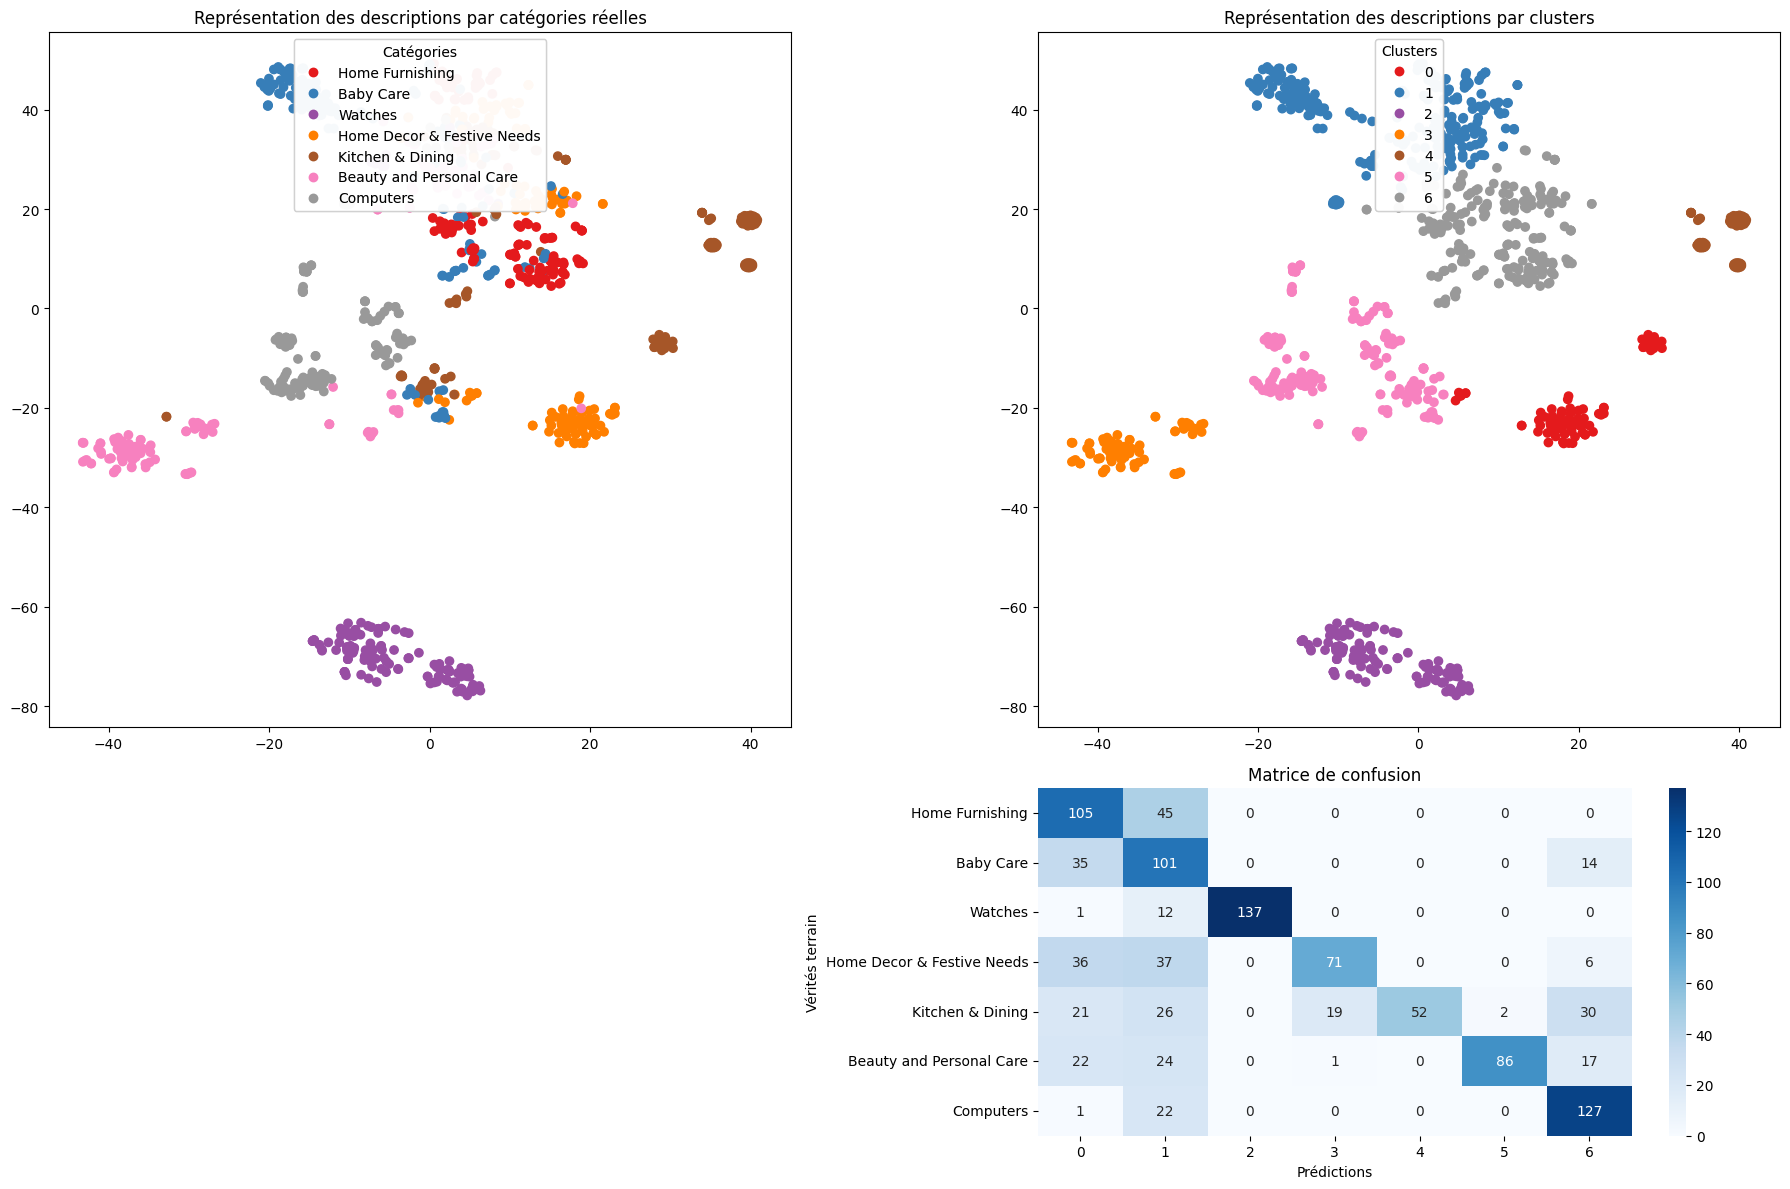

In [69]:
categories = data['cat_product_1']

# Obtention des catégories uniques et des labels numériques
l_cat = list(categories.unique())
y_cat_num = categories.apply(lambda x: l_cat.index(x))

# Calcul de l'ARI et visualisation avec TSNE
print("Word2Vec : ")
print("---------")
ARI, X_tsne, labels = ARI_fct(embeddings, l_cat, y_cat_num)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, l_cat)

### Synthèse

- **Catégorie réelles** : certaines catégories sont distincts et regroupés (pour la majorité des points) mais il y a un regroupement de plusieurs catégories qui indiquent une mauvaise qualité. 

- **Cluster** : le cluster correspondant à Watches est regroupé est éloigné des autres tout comme Kitchen&Dining

- **ARI** : Le score ARI confime l'analyse visuelle, les les cluters ne sont pas de très bonnes qualités.

## BERT

In [70]:
#Test du fonctionnement de BERT

# Charger le tokenizer et le modèle BERT pré-entraîné
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenizer une phrase d'exemple
inputs = tokenizer("Hello, my name is BERT", return_tensors="pt")

# Passer les inputs à travers le modèle
outputs = model(**inputs)

print(outputs.last_hidden_state.shape)

/Users/laurachatard/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint 

torch.Size([1, 8, 768])


### Préparation des données

In [71]:
# Pré-traitement des descriptions
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
encoded_data = tokenizer.batch_encode_plus(
    data['description_clean'].tolist(),
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length', 
    truncation=True,  
    max_length=128,
    return_tensors='pt'
)

In [72]:
input_ids = encoded_data['input_ids']
attention_masks = encoded_data['attention_mask']

# Encodage des catégories en labels numériques
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data['cat_product_1'])

# Conversion des labels en tenseurs
labels = torch.tensor(labels)

# Création du DataLoader
dataset = TensorDataset(input_ids, attention_masks, labels)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

### Configurer  et entrainer le modèle

In [73]:
# Charger les données
descriptions = data['description_clean'].tolist()

# Encodage des labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data['cat_product_1'])
num_labels = len(label_encoder.classes_)

# Prétraitement des descriptions
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
encoded_data = tokenizer.batch_encode_plus(
    descriptions,
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',
    max_length=128,
    truncation=True,
    return_tensors='pt'
)

input_ids = encoded_data['input_ids']
attention_masks = encoded_data['attention_mask']
labels = torch.tensor(labels)

# Créer des DataLoaders
dataset = TensorDataset(input_ids, attention_masks, labels)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

batch_size = 32

train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# Charger le modèle BERT pour la classification de séquences
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

# Déplacer le modèle sur le GPU Metal si disponible, sinon CPU
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
model.to(device)

# Définir l'optimiseur
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# Entraîner le modèle
epochs = 4

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for step, batch in enumerate(train_dataloader):
        batch_input_ids, batch_attention_masks, batch_labels = tuple(t.to(device) for t in batch)

        model.zero_grad()

        outputs = model(batch_input_ids, attention_mask=batch_attention_masks, labels=batch_labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_train_loss}")

print("Training complete.")

/Users/laurachatard/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are ini

Epoch 1/4, Loss: 1.7511721010561343
Epoch 2/4, Loss: 1.2101089512860332
Epoch 3/4, Loss: 0.6730940695162173
Epoch 4/4, Loss: 0.36438559382050123
Training complete.


### Evaluation et visualisation

In [74]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [75]:
model.eval()
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0

for batch in val_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

print(f"Validation Accuracy: {eval_accuracy/nb_eval_steps:.4f}")

Validation Accuracy: 0.9385


ARI :  0.3597 time :  6.0
Matrice de confusion originale:
 [[  0 101   0   0   0  14  35]
 [  1  24   0  86   0  17  22]
 [  0  22   0   0   0 127   1]
 [ 71  37   0   0   0   6  36]
 [  0  45   0   0   0   0 105]
 [ 19  26   0   2  52  30  21]
 [  0  12 137   0   0   0   1]]
Matrice de confusion transformée:
 [[101   0  14   0  35   0   0]
 [ 24  86  17   1  22   0   0]
 [ 22   0 127   0   1   0   0]
 [ 37   0   6  71  36   0   0]
 [ 45   0   0   0 105   0   0]
 [ 26   2  30  19  21  52   0]
 [ 12   0   0   0   1   0 137]]


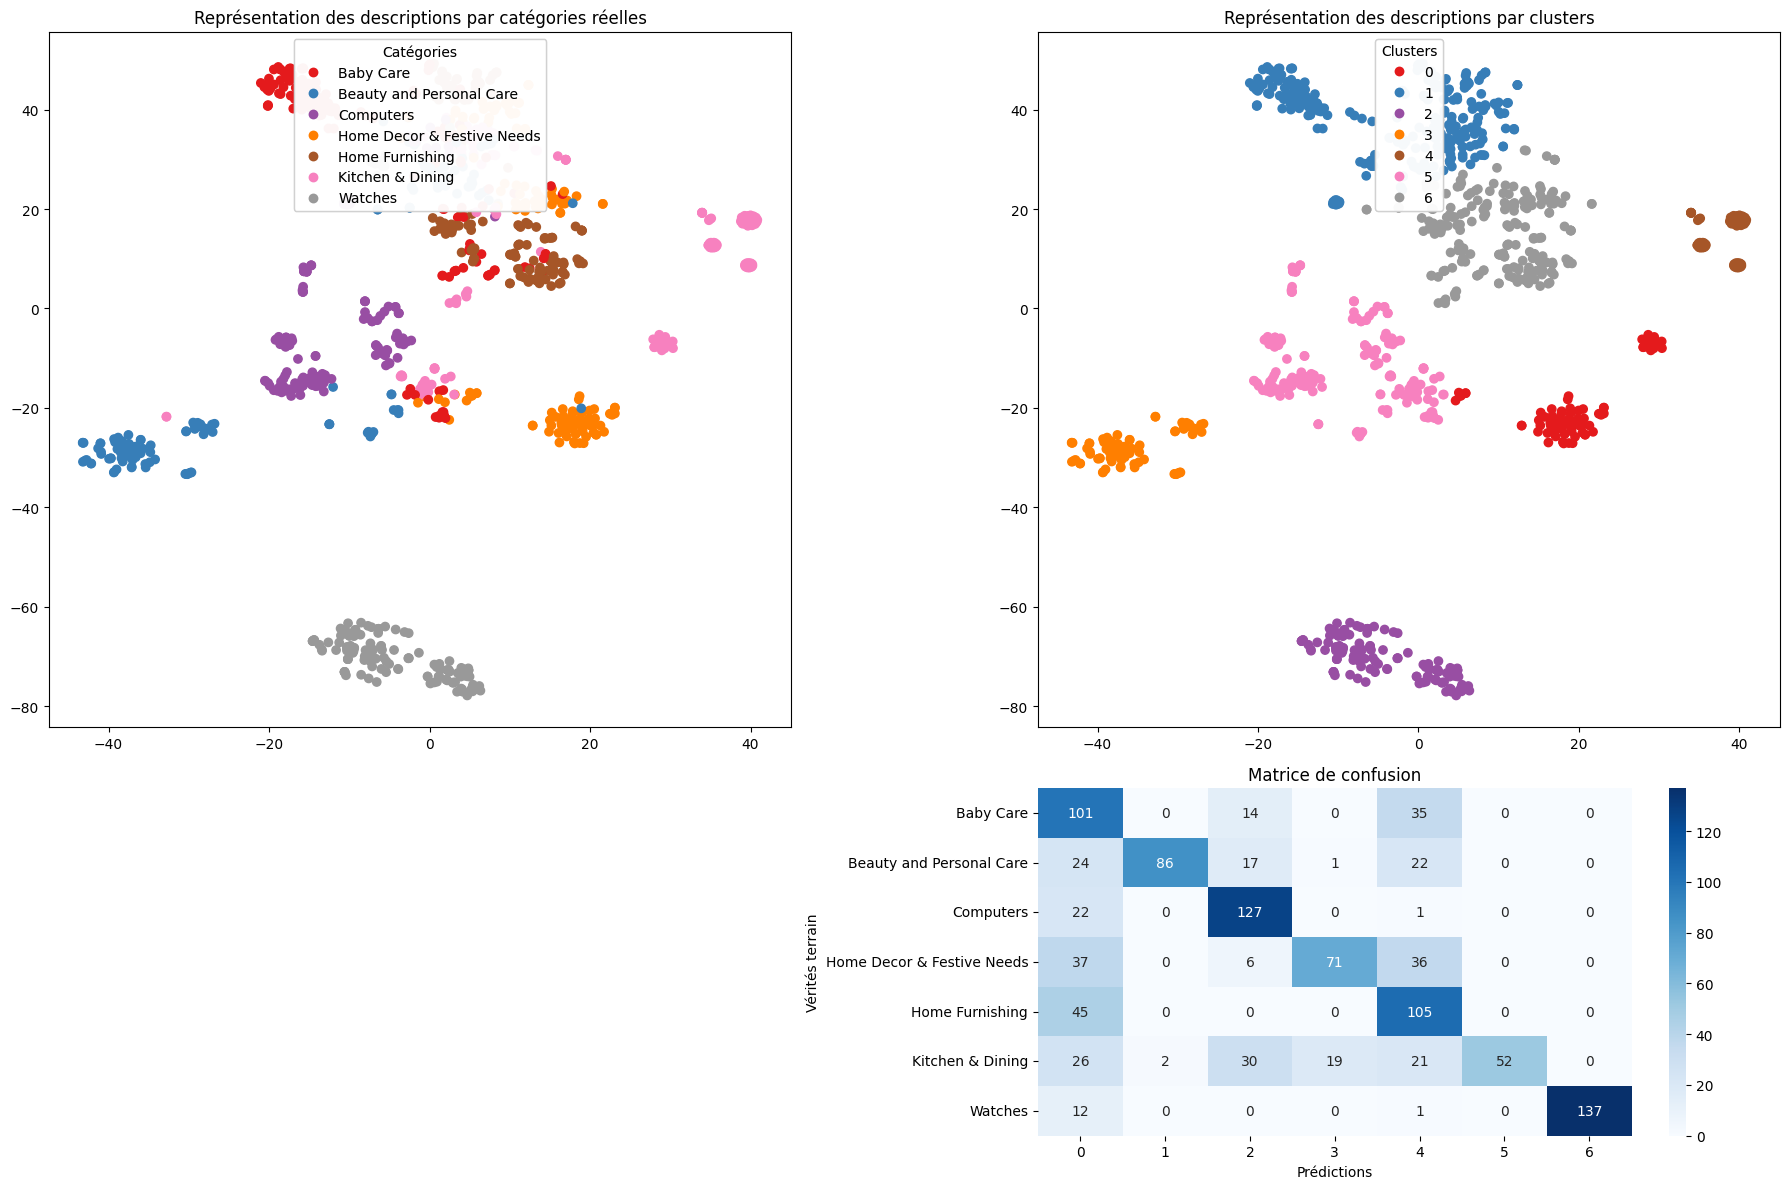

In [76]:
# Calculer et visualiser t-SNE
ARI, X_tsne, labels = ARI_fct(embeddings, label_encoder.classes_, label_encoder.transform(data['cat_product_1']))

# Visualisation avec t-SNE
TSNE_visu_fct(X_tsne, label_encoder.transform(data['cat_product_1']), labels, ARI, label_encoder.classes_)

### Synthèse

- **Validation accuracy** : la première metrique de validation est de 0.92 ce qui est plutôt très bon.

- **Visualisation** : on peut voir que certaines catégories ne sont pas de bonnes qualités (bien regroupées et séparées), en revanche Watches est plutôt bien défini.

- **ARI** : le score ARI est mauvais pour la comparaison des catégories et clusters

## USE

In [77]:
# Charger le modèle USE depuis TensorFlow Hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder/3"
model_use = hub.load(module_url)

# Encoder les descriptions
descriptions = data['description_clean'].tolist()
embeddings = model_use(descriptions)

ARI :  0.3989 time :  6.0
Matrice de confusion originale:
 [[ 14   8   5 100   6  14   3]
 [  0  38   0   9  80  14   9]
 [  0  76   1   0  72   0   1]
 [  0  14   0  14   0  79  43]
 [ 74   3   0  73   0   0   0]
 [  1   9   0   4   7  48  81]
 [  0   0 144   0   6   0   0]]
Matrice de confusion transformée:
 [[100   6   8  14  14   3   5]
 [  9  80  38  14   0   9   0]
 [  0  72  76   0   0   1   1]
 [ 14   0  14  79   0  43   0]
 [ 73   0   3   0  74   0   0]
 [  4   7   9  48   1  81   0]
 [  0   6   0   0   0   0 144]]


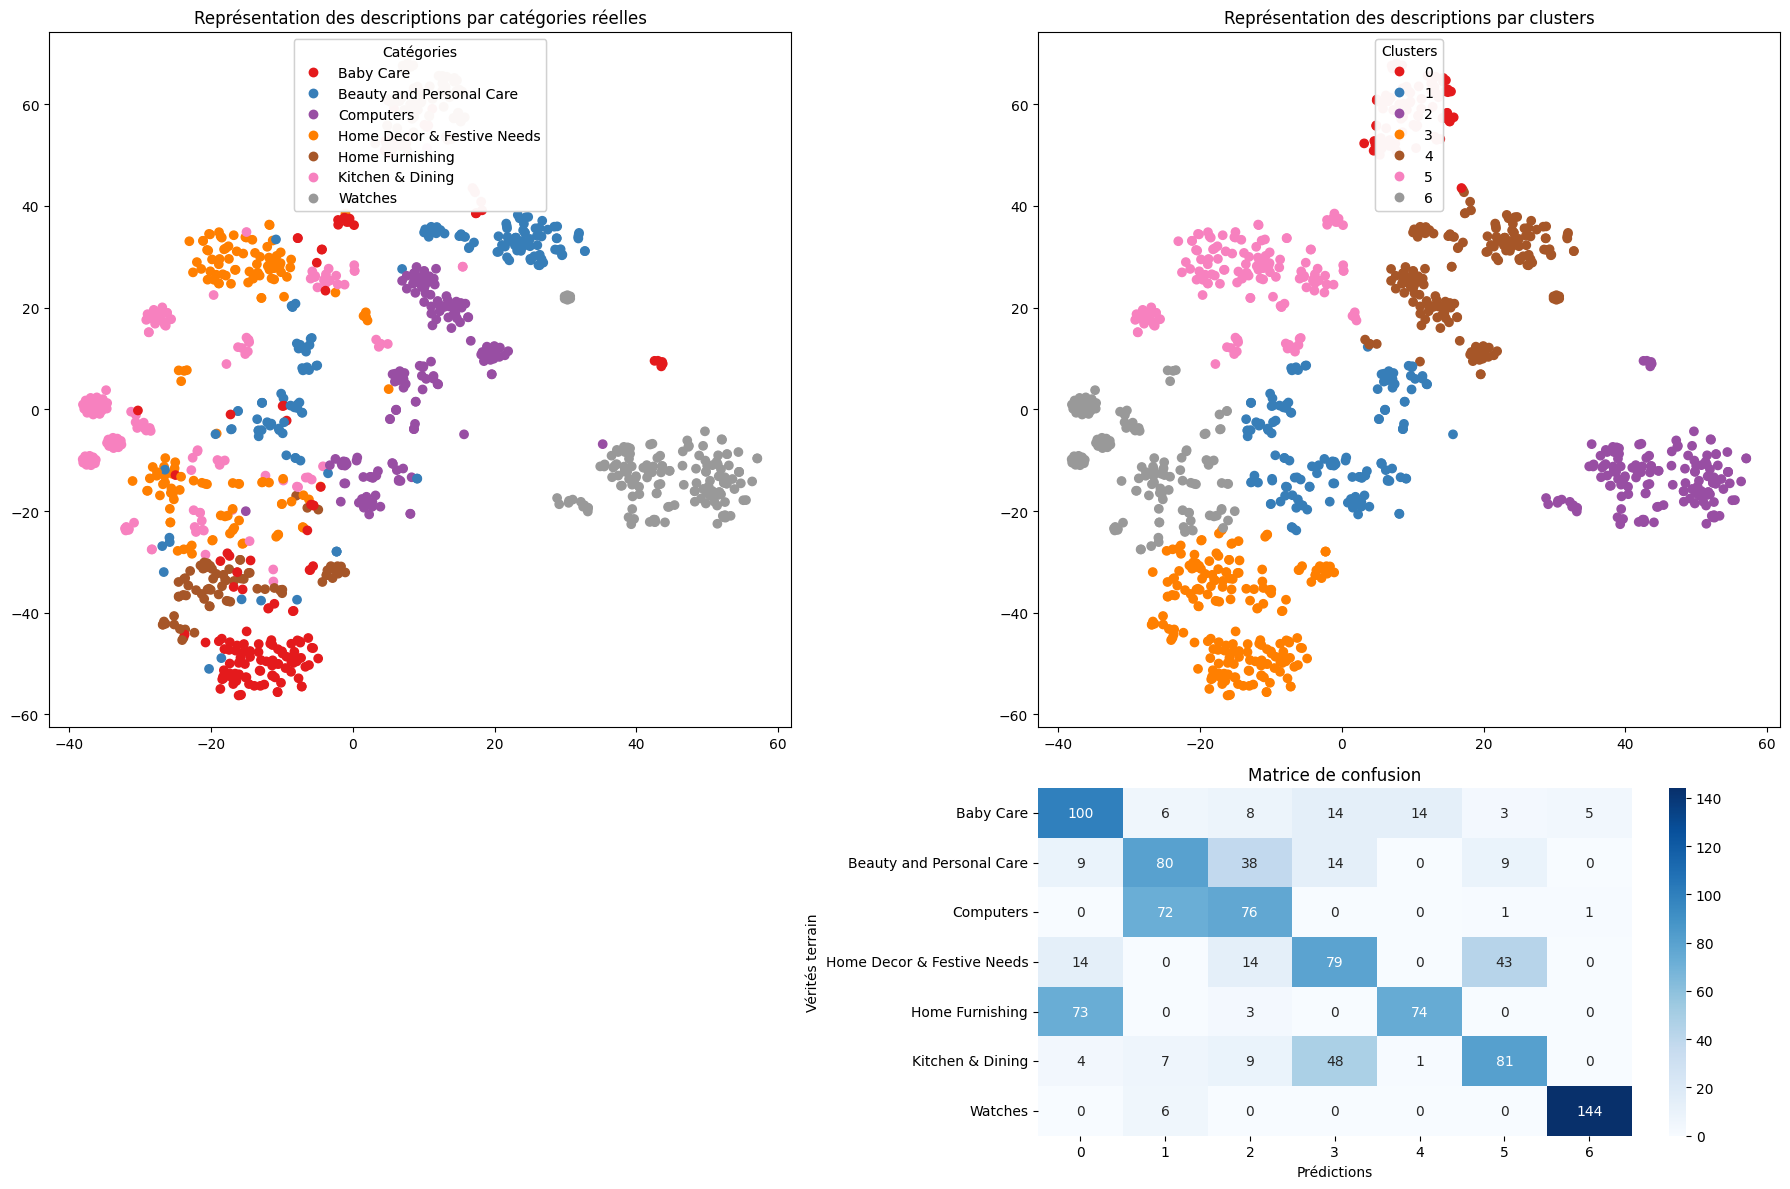

In [78]:
# Vérifier et convertir les embeddings en numpy array
if isinstance(embeddings, dict):
    embeddings_tensor = embeddings['outputs'] if 'outputs' in embeddings else list(embeddings.values())[0]
else:
    embeddings_tensor = embeddings
    
embeddings_numpy = embeddings_tensor.numpy()

# Encoder les catégories
label_encoder = LabelEncoder()
data['cat_product_1_encoded'] = label_encoder.fit_transform(data['cat_product_1'])

# Calculer ARI et TSNE
ARI, X_tsne, labels = ARI_fct(embeddings_numpy, label_encoder.classes_, data['cat_product_1_encoded'])

# Visualiser les résultats
TSNE_visu_fct(X_tsne, data['cat_product_1_encoded'], labels, ARI, label_encoder.classes_)